In [66]:
#basic imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
import numpy as np
import seaborn as sns
from scipy.interpolate import CubicSpline
import re

In [67]:
df = pd.read_excel("data/finalannotation.xlsx")
df1 = pd.read_excel("data/finalannotation+poststats.xlsx")
df2 = pd.read_excel("data/finalannotation+poststats+date.xlsx")
fulldf = pd.read_csv("data/finalwbdataset.csv")

In [68]:
df.columns

Index(['Post_ID', 'Post_Title', 'Post_URL', 'Comment_ID', 'Body', 'Score',
       'Subreddit', 'type label post', 'ethical issue label post 1',
       'ethical issue label post 2', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment', 'new class type', 'new ethical issues',
       'Unnamed: 17'],
      dtype='object')

In [69]:
df1.columns

Index(['Unnamed: 0', 'Post_ID', 'Post_Title', 'Post_URL', 'Comment_ID',
       'Post_Score', 'Num_Comments', 'Body', 'Score', 'Subreddit',
       'type label post', 'ethical issue label post 1',
       'ethical issue label post 2', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'],
      dtype='object')

In [70]:
df1 = df1.drop(columns = ["Unnamed: 0"])

In [71]:
df1.sample(1)

,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment
332,i54g2o,Facebook Fired An Employee Who Collected Evide...,https://www.buzzfeednews.com/article/craigsilv...,g0mzlws,61405,2369,So... there *is* a conservative bias! It's jus...,851,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing


In [72]:
df = df.drop(columns = ["new class type", "new ethical issues", "Unnamed: 17"])

In [73]:
df_related = df[df["stance comment"] != "3. unrelated to whistleblowing"]

In [213]:
df_posts = df1.drop_duplicates("Post_ID")
len(df_posts)

132

In [216]:
len(df_posts[df_posts["ethical issue label post 2"] == "13. only one issue"])

45

In [75]:
df_posts["ethical issue label post 1"].value_counts()

0. privacy                      42
9. whistleblower retaliation    26
5. manipulation                 24
3. discrimination               14
7. safety                       11
11. unrelated                    7
1. content moderation            4
4. misinformation                3
6. cybersecurity                 1
Name: ethical issue label post 1, dtype: int64

In [76]:
df_posts["ethical issue label post 2"].value_counts()

13. only one issue              45
5. manipulation                 29
0. privacy                      22
3. discrimination               10
11. unrelated                    7
7. safety                        6
9. whistleblower retaliation     6
4. misinformation                4
6. cybersecurity                 2
2. addiction                     1
Name: ethical issue label post 2, dtype: int64

In [77]:
df["ethical issue label comment 1"].value_counts()

11. unrelated                   539
9. whistleblower retaliation    123
5. manipulation                 100
0. privacy                       91
3. discrimination                63
7. safety                        57
1. content moderation            21
4. misinformation                 5
2. addiction                      1
Name: ethical issue label comment 1, dtype: int64

In [78]:
df["ethical issue label comment 2"].value_counts()

11. unrelated                   539
13. only one issue              251
5. manipulation                  75
0. privacy                       46
3. discrimination                31
7. safety                        20
9. whistleblower retaliation     18
4. misinformation                14
6. cybersecurity                  3
1. content moderation             3
Name: ethical issue label comment 2, dtype: int64

In [79]:
df["stance comment"].value_counts(normalize = True)

3. unrelated to whistleblowing    0.520
0. for whistleblowing             0.329
1. against whistleblowing         0.110
2. neutral                        0.041
Name: stance comment, dtype: float64

In [80]:
df["stance comment"].value_counts()

3. unrelated to whistleblowing    520
0. for whistleblowing             329
1. against whistleblowing         110
2. neutral                         41
Name: stance comment, dtype: int64

In [81]:
df["stance post"].value_counts()

0. for whistleblowing             811
2. neutral                        124
3. unrelated to whistleblowing     60
1. against whistleblowing           5
Name: stance post, dtype: int64

In [82]:
df_posts["stance post"].value_counts()

0. for whistleblowing             107
2. neutral                         17
3. unrelated to whistleblowing      7
1. against whistleblowing           1
Name: stance post, dtype: int64

In [83]:
df["Score"].mean()

1099.307

In [84]:
df["Score"].min()

-497

In [85]:
df_lowscore = df[df["Score"] < 0]
df_highscore = df[df["Score"] > 0]
df_unrelated = df[df["stance comment"] == "3. unrelated to whistleblowing"]

In [229]:
df_lowscore["stance comment"].value_counts(normalize = True)

3. unrelated to whistleblowing    0.630
1. against whistleblowing         0.206
0. for whistleblowing             0.136
2. neutral                        0.028
Name: stance comment, dtype: float64

In [231]:
df_highscore["stance comment"].value_counts()

0. for whistleblowing             261
3. unrelated to whistleblowing    205
2. neutral                         27
1. against whistleblowing           7
Name: stance comment, dtype: int64

In [88]:
for x in df_highscore["stance comment"].value_counts():
    print(x)

261
205
27
7


In [89]:
df_highscore["stance comment"].value_counts(normalize = True)

0. for whistleblowing             0.522
3. unrelated to whistleblowing    0.410
2. neutral                        0.054
1. against whistleblowing         0.014
Name: stance comment, dtype: float64

In [90]:
len(df_unrelated[df_unrelated["Score"] < 0])

315

In [91]:
series = df_lowscore["stance comment"].value_counts(normalize = True)

In [92]:
for i in series.index:
    print(i)

3. unrelated to whistleblowing
1. against whistleblowing
0. for whistleblowing
2. neutral


In [93]:
for i in df_lowscore["stance comment"].value_counts(normalize = True).items():
    print(i)

('3. unrelated to whistleblowing', 0.63)
('1. against whistleblowing', 0.206)
('0. for whistleblowing', 0.136)
('2. neutral', 0.028)


In [94]:
related = df[df["stance comment"] != "3. unrelated to whistleblowing"]
related_lowscore = related[related["Score"] < 0]
related_highscore = related[related["Score"] > 0]
related_lowscore["stance comment"].value_counts(normalize = False)

1. against whistleblowing    103
0. for whistleblowing         68
2. neutral                    14
Name: stance comment, dtype: int64

In [95]:
related_highscore["stance comment"].value_counts()

0. for whistleblowing        261
2. neutral                    27
1. against whistleblowing      7
Name: stance comment, dtype: int64

In [96]:
df2 = df2.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
df2.sample(1)

,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,post_date,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment
12,1bcf9rh,Boeing whistleblower found dead in US in appar...,https://www.bbc.com/news/business-68534703,kufksdz,57680,4363,What do you mean? You don’t think Jeffrey brok...,2014,11-03-2024,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing


In [4]:
fulldf.sample()

,Unnamed: 0,Post_ID,Post_Title,Post_URL,Comment_ID,Body,Score,Ups,Downs,Subreddit,Creation_Date
2543,17939,twbsev,Leaked: New Amazon Worker Chat App to Ban Word...,https://theintercept.com/2022/04/04/amazon-uni...,i3emtzn,This is one of those things people were warnin...,212,212,0,technology,2022-04-04 21:28:10 UTC


In [5]:
fulldf_post = fulldf.drop_duplicates("Post_ID")

In [6]:
fulldf_post["Subreddit"].value_counts()

technology    214
technews       22
tech           13
Name: Subreddit, dtype: int64

In [9]:
df_postscores = pd.read_excel("all_posts_withdate_scores.xlsx")

In [21]:
df_postscores = df_postscores.sort_values(by = "post_score", ascending = False)
df_postscores_high = df_postscores[df_postscores["post_score"] >= 10000]
df_postscores_high

,Post_ID,post_score
80,ja0oi4,84661
245,vkg164,84205
235,twbsev,81106
87,k8suwj,80102
243,q6j0ly,69680
...,...,...
124,bpqxvw,11839
111,dwcnyd,10658
94,veoh1e,10524
32,86ku22,10460


In [45]:
fulldf_post["Post_ID"].to_list()

['q6j0ly',
 '8krbip',
 'dsfdr3',
 'pquc6d',
 '85z5e9',
 'k9hkkk',
 '13rsxb5',
 '1bcf9rh',
 'vx8ho1',
 'vkg164',
 'vekp1h',
 'yv3y7f',
 'k8suwj',
 '1bfemgu',
 'hjp9d2',
 'twbsev',
 'ja0oi4',
 'moliff',
 'q7wisc',
 'sukcyd',
 'i6rj8f',
 '83mw8p',
 '4uavdb',
 't51xtf',
 '1ckf50x',
 'gt52qc',
 '53h3hz',
 'oncgqx',
 '9tbigf',
 '8cvzre',
 'auox8l',
 'wvvye7',
 'lcc5dv',
 '1ci89l2',
 'iqqz16',
 '86kf3a',
 'ilj47l',
 '1bkutt3',
 'bdsy1x',
 'c38kvj',
 'i54g2o',
 'y28u39',
 'v4gxdm',
 'ejz93k',
 '5iox6y',
 '34zwfc',
 '1gtn9g',
 'wcxf1a',
 'dsof5u',
 'sw8lws',
 'py31u3',
 'ar0h6l',
 'v0n9gn',
 '1c08er5',
 '850t12',
 '19ezv8a',
 '1c057ld',
 'bpqxvw',
 '1c76uka',
 '1ch2aq1',
 '5tzvfp',
 '1c5siwi',
 'by7que',
 'b2gigo',
 'xcq2f2',
 '2f095v',
 'w4ccou',
 'dwcnyd',
 '18cdcfz',
 '15eu0fe',
 '37csm5',
 '1guot5',
 '1idagr',
 '2pcs3j',
 '1c3juua',
 '86ku22',
 '2ozeop',
 'r0aqz9',
 '4b61dv',
 'zrb65r',
 'uwvgv5',
 'ykk0rh',
 'muxdd3',
 'dlsdrx',
 'veoh1e',
 'v59z3x',
 'cii80t',
 '9jd7zm',
 '4dn4kk',
 '12dg

In [32]:
for i in df2['post_date'][0:3]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>


In [53]:
#date column to datetime format
df2['post_date'] = pd.to_datetime(df2['post_date'], format='%d-%m-%Y')

def get_year_quarter(date):
    quarter = (date.month - 1) // 3 + 1
    return f"{date.year} Q{quarter}"

#df2['year_quarter'] = df2['post_date'].apply(get_year_quarter)

In [57]:
df2['post_date'] = pd.to_datetime(df2['post_date'], format='%d-%m-%Y')

def get_year(date):
    return f"{date.year}"

#create new column with function
df2['year'] = df2['post_date'].apply(get_year)

In [59]:
df2.sample(1)

,Unnamed: 0,Unnamed: 0.1,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,...,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment,year
608,608,608,v4gxdm,Leaked Google audio shows employees grilling e...,https://archive.ph/htajE,ib4fo2l,30225,3092,At least I haven't faced this and nor have my ...,-30,...,technology,1. article about whistleblower,3. discrimination,13. only one issue,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing,2022


In [63]:
df2_posts = df2.drop_duplicates("Post_ID")
df2_posts = df2_posts.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])

In [64]:
df2_posts["year"].value_counts()

2022    24
2018    16
2021    16
2019    15
2016    14
2020    13
2024    13
2015     6
2014     5
2023     5
2013     4
2017     1
Name: year, dtype: int64

In [65]:
df2_posts.sort_values(by = ["year"], ascending = True)

,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,post_date,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment,year
877,1guot5,Greenwald On the Espionage Act charges against...,http://www.guardian.co.uk/commentisfree/2013/j...,cao12y8,3587,1254,These threads highlight how Reddit has become ...,-31,2013-06-22,technology,0. general comment about whistleblower,0. privacy,9. whistleblower retaliation,0. for whistleblowing,0. general comment about whistleblower,0. privacy,9. whistleblower retaliation,1. against whistleblowing,2013
370,1enzdn,Former Google Exec Turns Whistleblower On Comp...,http://techcrunch.com/2013/05/19/former-google...,ca24vpi,544,76,Google can spend that money better than the UK...,-43,2013-05-20,technology,1. article about whistleblower,5. manipulation,13. only one issue,0. for whistleblowing,0. general comment about whistleblower,5. manipulation,13. only one issue,1. against whistleblowing,2013
931,1j77u4,Edward Snowden's not the story. The fate of th...,http://www.guardian.co.uk/technology/2013/jul/...,cbbvy3v,917,28,That's because Mr Snowden has made this about ...,-27,2013-07-28,technology,1. article about whistleblower,0. privacy,13. only one issue,0. for whistleblowing,0. general comment about whistleblower,0. privacy,13. only one issue,1. against whistleblowing,2013
802,1gtn9g,U.S. charges Edward Snowden with espionage,http://www.washingtonpost.com/world/national-s...,canryzw,3637,3685,Reddit gets it wrong.....again. He was not cha...,1951,2013-06-21,technology,1. article about whistleblower,9. whistleblower retaliation,0. privacy,2. neutral,0. general comment about whistleblower,9. whistleblower retaliation,0. privacy,2. neutral,2013
962,2ozeop,Sony leaked email reveals secret anti-piracy m...,http://www.theverge.com/2014/12/11/7376599/ant...,cms15vi,4179,336,I have to be honest... the headline says it's ...,1063,2014-12-11,technology,1. article about whistleblower,0. privacy,13. only one issue,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,19ezv8a,Boeing Whistleblower: Production Line Has “Eno...,https://viewfromthewing.com/boeing-whistleblow...,kjgihjo,11954,1082,So what we’re seeing is quality issue resultin...,2229,2024-01-25,technology,1. article about whistleblower,7. safety,13. only one issue,0. for whistleblowing,0. general comment about whistleblower,7. safety,13. only one issue,0. for whistleblowing,2024
851,1bkutt3,Boeing whistleblower John Barnett was spied on...,https://www.foxbusiness.com/markets/boeing-whi...,kw0wnzd,29232,1159,Literally everyone knows this man was murdered...,4204,2024-03-22,technology,0. general comment about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing,2024
31,1ckf50x,Boeing faces ten more whistleblowers after sud...,https://www.hindustantimes.com/world-news/us-n...,l2mik4b,48192,1896,Some hitman is gonna be able to send his kids ...,2903,2024-05-05,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing,2024
979,1c3juua,Another Boeing whistleblower says he faced ret...,https://www.npr.org/2024/04/12/1244147895/boei...,kzhou67,13994,507,"None. Lol, you use the word hijacking... The p...",-48,2024-04-14,technology,1. article about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing,0. general comment about whistleblower,7. safety,13. only one issue,0. for whistleblowing,2024


In [93]:
df2posts_retal = df2_posts[(df2_posts["ethical issue label post 1"] == "9. whistleblower retaliation") | (df2_posts["ethical issue label post 2"] == "9. whistleblower retaliation")]

In [67]:
df2posts_privacy = df2_posts[(df2_posts["ethical issue label post 1"] == "0. privacy") | (df2_posts["ethical issue label post 2"] == "0. privacy")]

In [68]:
df2posts_manip = df2_posts[(df2_posts["ethical issue label post 1"] == "5. manipulation") | (df2_posts["ethical issue label post 2"] == "5. manipulation")]

In [69]:
df2posts_disc = df2_posts[(df2_posts["ethical issue label post 1"] == "3. discrimination") | (df2_posts["ethical issue label post 2"] == "3. discrimination")]

In [70]:
df2posts_safety = df2_posts[(df2_posts["ethical issue label post 1"] == "7. safety") | (df2_posts["ethical issue label post 2"] == "7. safety")]

In [94]:
df2posts_retal.columns

Index(['Post_ID', 'Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score', 'post_date', 'Subreddit',
       'type label post', 'ethical issue label post 1',
       'ethical issue label post 2', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment', 'year'],
      dtype='object')

In [95]:
df2posts_retal = df2posts_retal.drop(columns = ['Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score','Subreddit',
       'type label post', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'])


df2posts_retal['year sum'] = df2posts_retal.groupby('year')['year'].transform('size')

df2posts_retal = df2posts_retal.drop_duplicates("year")
df2posts_retal

In [127]:
retallist = df2posts_retal[["year", "year sum"]].sort_values(by = "year", ascending = True)

In [105]:
df2posts_privacy = df2posts_privacy.drop(columns = ['Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score','Subreddit',
       'type label post', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'])


df2posts_privacy['year sum'] = df2posts_privacy.groupby('year')['year'].transform('size')

df2posts_privacy = df2posts_privacy.drop_duplicates("year")
df2posts_privacy

,Post_ID,post_date,ethical issue label post 1,ethical issue label post 2,year,year sum
247,2pcs3j,2014-12-15,0. privacy,13. only one issue,2014,5
282,oncgqx,2021-07-19,0. privacy,13. only one issue,2021,7
344,5tzvfp,2017-02-14,9. whistleblower retaliation,0. privacy,2017,1
406,8krbip,2018-05-20,5. manipulation,0. privacy,2018,11
486,bdsy1x,2019-04-16,0. privacy,13. only one issue,2019,12
494,w4ccou,2022-07-21,5. manipulation,0. privacy,2022,5
497,ejz93k,2020-01-04,5. manipulation,0. privacy,2020,2
677,5iox6y,2016-12-16,9. whistleblower retaliation,0. privacy,2016,12
802,1gtn9g,2013-06-21,9. whistleblower retaliation,0. privacy,2013,3
848,37csm5,2015-05-26,0. privacy,9. whistleblower retaliation,2015,5


In [113]:
privlist = df2posts_privacy[["year", "year sum"]].sort_values(by = "year", ascending = True)

In [107]:
df2posts_manip = df2posts_manip.drop(columns = ['Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score','Subreddit',
       'type label post', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'])


df2posts_manip['year sum'] = df2posts_manip.groupby('year')['year'].transform('size')

df2posts_manip = df2posts_manip.drop_duplicates("year")
df2posts_manip

,Post_ID,post_date,ethical issue label post 1,ethical issue label post 2,year,year sum
104,oitv8y,2021-07-12,9. whistleblower retaliation,5. manipulation,2021,9
105,jvpdhy,2020-11-17,5. manipulation,4. misinformation,2020,7
277,9tbigf,2018-11-01,1. content moderation,5. manipulation,2018,13
289,sukcyd,2022-02-17,5. manipulation,3. discrimination,2022,12
370,1enzdn,2013-05-20,5. manipulation,13. only one issue,2013,1
372,4uavdb,2016-07-24,1. content moderation,5. manipulation,2016,1
672,c38kvj,2019-06-21,0. privacy,5. manipulation,2019,6
899,15eu0fe,2023-07-31,0. privacy,5. manipulation,2023,1
916,2j22mw,2014-10-12,0. privacy,5. manipulation,2014,2
983,1cnj5ef,2024-05-08,9. whistleblower retaliation,5. manipulation,2024,1


In [114]:
maniplist = df2posts_manip[["year", "year sum"]].sort_values(by = "year", ascending = True)

In [109]:
df2posts_disc = df2posts_disc.drop(columns = ['Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score','Subreddit',
       'type label post', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'])


df2posts_disc['year sum'] = df2posts_disc.groupby('year')['year'].transform('size')

df2posts_disc = df2posts_disc.drop_duplicates("year")
df2posts_disc

,Post_ID,post_date,ethical issue label post 1,ethical issue label post 2,year,year sum
43,moliff,2021-04-11,9. whistleblower retaliation,3. discrimination,2021,4
127,83mw8p,2018-03-11,3. discrimination,13. only one issue,2018,3
289,sukcyd,2022-02-17,5. manipulation,3. discrimination,2022,11
726,by7que,2019-06-08,9. whistleblower retaliation,3. discrimination,2019,1
753,1ch2aq1,2024-04-30,3. discrimination,13. only one issue,2024,2
784,j65qqr,2020-10-06,5. manipulation,3. discrimination,2020,1
952,12dg41n,2023-04-06,3. discrimination,13. only one issue,2023,1
953,2pkwwl,2014-12-17,0. privacy,3. discrimination,2014,1


In [115]:
disclist = df2posts_disc[["year", "year sum"]].sort_values(by = "year", ascending = True)

In [111]:
df2posts_safety = df2posts_safety.drop(columns = ['Post_Title', 'Post_URL', 'Comment_ID', 'Post_Score',
       'Num_Comments', 'Body', 'Score','Subreddit',
       'type label post', 'stance post', 'type label comment',
       'ethical issue label comment 1', 'ethical issue label comment 2',
       'stance comment'])


df2posts_safety['year sum'] = df2posts_safety.groupby('year')['year'].transform('size') #count the years

df2posts_safety = df2posts_safety.drop_duplicates("year")
df2posts_safety

,Post_ID,post_date,ethical issue label post 1,ethical issue label post 2,year,year sum
0,1bcf9rh,2024-03-11,9. whistleblower retaliation,7. safety,2024,9
63,13rsxb5,2023-05-25,7. safety,13. only one issue,2023,3
269,y28u39,2022-10-12,7. safety,13. only one issue,2022,1
503,dsfdr3,2019-11-06,7. safety,13. only one issue,2019,1
982,pquc6d,2021-09-18,5. manipulation,7. safety,2021,2
984,2r1a6q,2015-01-01,6. cybersecurity,7. safety,2015,1


In [116]:
safelist = df2posts_safety[["year", "year sum"]].sort_values(by = "year", ascending = True)

In [136]:
safelist

,year,year sum
984,2015,1
503,2019,1
982,2021,2
269,2022,1
63,2023,3
0,2024,9


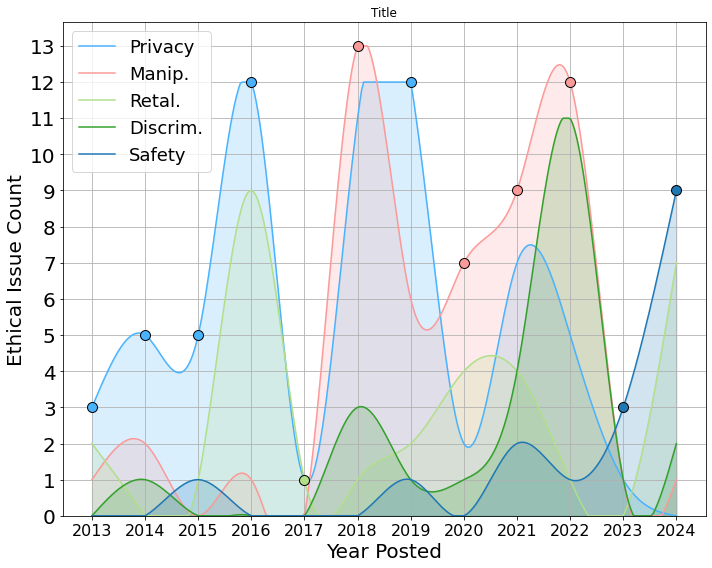

In [226]:
x_values = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

x_values_int = np.arange(len(x_values))
priv_values = np.array([3, 5, 5, 12, 1, 11, 12, 2, 7, 5, 1, 0])
manip_values = np.array([1, 2, 0, 1, 0, 13, 6, 7, 9, 12, 1, 1])
retal_values = np.array([2, 0, 1, 9, 1, 1, 2, 4, 4, 1, 0, 7])
disc_values = np.array([0, 1, 0, 0, 0, 3, 1, 1, 4, 11, 1, 2])
safe_values = np.array([0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 3, 9])

marker_values = np.array([3, 5, 5, 12, 1, 13, 12, 7, 9, 12, 3, 9])

#colors for the markers corresponding to the line color
colors = ["#49b3fe", "#49b3fe", "#49b3fe", "#49b3fe", "#b2df8a", "#fb9a99", "#49b3fe", "#fb9a99", "#fb9a99", "#fb9a99", "#1f78b4", "#1f78b4"]

#function that changes the lines to smoother splines
def smooth_line(x, y):
    cs = CubicSpline(x, y, bc_type='natural')
    x_new = np.linspace(x.min(), x.max(), 300) #change this number to change the appearance of the splines
    y_new = cs(x_new)
    y_new = np.clip(y_new, y.min(), y.max()) #cut off the lines to fit the data better, unfortunately not 100% accurate
    return x_new, y_new


plt.figure(figsize=(10, 8))

#apply the smoothness function to every line, write labels, colors, insert fill color
for y_values, label, color in zip(
    [priv_values, manip_values, retal_values, disc_values, safe_values],
    ['Privacy', 'Manip.', 'Retal.', 'Discrim.', 'Safety'],
    ['#49b3fe', '#fb9a99', '#b2df8a', '#33a02c', '#1f78b4']
):

    x_new, y_new = smooth_line(x_values_int, y_values)
    
    plt.plot(x_new, y_new, label=label, color=color)
    
    plt.fill_between(x_new, y_new, alpha=0.2, color=color)  #change alpha for opacity

#plot markers using the marker_values list and their colors
for i, (marker_val, color) in enumerate(zip(marker_values, colors)):
    plt.scatter(x_values_int[i], marker_val, color=color, edgecolor='black', s=100, zorder=5)  # Marker


plt.title("Title")
plt.xlabel("Year Posted", fontsize = 20)
plt.ylabel("Ethical Issue Count", fontsize = 20)

all_y_ticks = np.arange(0, np.max(marker_values) + 1, 1)
plt.yticks(ticks=all_y_ticks, fontsize = 20)


plt.xticks(ticks=x_values_int, labels=x_values, fontsize = 16)

plt.ylim(bottom=0)


plt.legend(fontsize = 18)


plt.grid(True)
plt.tight_layout()
plt.show()


In [260]:
df_allposts = pd.read_excel("all_posts_withdate1.xlsx")

In [261]:
df_allposts

,Post_ID,Num_Comments,Post_Date
0,wcxf1a,652,31-07-2022
1,c38kvj,1226,21-06-2019
2,q0zh11,97,04-10-2021
3,vwhrpz,174,11-07-2022
4,38v69p,137,07-06-2015
...,...,...,...
244,1gbdti,28,14-06-2013
245,vkg164,6195,25-06-2022
246,q286rz,357,05-10-2021
247,k9hkkk,3935,09-12-2020


In [262]:
df_allposts['Post_Date'] = pd.to_datetime(df_allposts['Post_Date'], format='%d-%m-%Y')

df_allposts['Year'] = df_allposts['Post_Date'].apply(get_year)

df_allposts

,Post_ID,Num_Comments,Post_Date,Year
0,wcxf1a,652,2022-07-31,2022
1,c38kvj,1226,2019-06-21,2019
2,q0zh11,97,2021-10-04,2021
3,vwhrpz,174,2022-07-11,2022
4,38v69p,137,2015-06-07,2015
...,...,...,...,...
244,1gbdti,28,2013-06-14,2013
245,vkg164,6195,2022-06-25,2022
246,q286rz,357,2021-10-05,2021
247,k9hkkk,3935,2020-12-09,2020


In [263]:
df_allposts_score = pd.read_excel("all_posts_withdate_scores.xlsx")

In [264]:
df_allposts_score

,Post_ID,post_score
0,wcxf1a,4764
1,c38kvj,39192
2,q0zh11,1134
3,vwhrpz,4278
4,38v69p,1411
...,...,...
244,1gbdti,155
245,vkg164,84205
246,q286rz,4687
247,k9hkkk,49552


In [265]:
df_allposts["Post_Score"] = df_allposts_score["post_score"]

In [266]:
df_allposts

,Post_ID,Num_Comments,Post_Date,Year,Post_Score
0,wcxf1a,652,2022-07-31,2022,4764
1,c38kvj,1226,2019-06-21,2019,39192
2,q0zh11,97,2021-10-04,2021,1134
3,vwhrpz,174,2022-07-11,2022,4278
4,38v69p,137,2015-06-07,2015,1411
...,...,...,...,...,...
244,1gbdti,28,2013-06-14,2013,155
245,vkg164,6195,2022-06-25,2022,84205
246,q286rz,357,2021-10-05,2021,4687
247,k9hkkk,3935,2020-12-09,2020,49552


In [279]:
round(df_allposts["Num_Comments"].max(), 0)

6195

In [280]:
round(df_allposts["Post_Score"].max(), 0)

84661

In [281]:
df_allposts['year sum'] = df_allposts.groupby('Year')['Year'].transform('size')

In [286]:
df_allposts_yearsum = df_allposts.drop_duplicates("Year")
df_allposts_yearsum = df_allposts_yearsum.sort_values(by = "Year", ascending = True)
df_allposts_yearsum

,Post_ID,Num_Comments,Post_Date,Year,Post_Score,year sum
39,et0xg,82,2010-12-29,2010,631,3
60,h3x84,131,2011-05-04,2011,1005,2
13,1it7y5,151,2013-07-22,2013,868,11
40,2bb2rd,61,2014-07-21,2014,328,10
4,38v69p,137,2015-06-07,2015,1411,11
5,49nrp2,51,2016-03-09,2016,450,22
41,5tzvfp,1057,2017-02-14,2017,20797,2
6,9tbigf,626,2018-11-01,2018,33822,37
1,c38kvj,1226,2019-06-21,2019,39192,25
26,jufxm2,51,2020-11-15,2020,896,18


In [299]:
df_allposts_yearsum["year sum"].mean()

17.785714285714285

In [268]:
df_allposts["Year"].value_counts()

2022    41
2021    38
2018    37
2019    25
2016    22
2020    18
2024    18
2023    11
2015    11
2013    11
2014    10
2010     3
2011     2
2017     2
Name: Year, dtype: int64

In [243]:
df_allposts_2010 = df_allposts[df_allposts["Year"] == "2010"]

In [244]:
df_allposts_2010

,Post_ID,Num_Comments,Post_Date,Year
39,et0xg,82,2010-12-29,2010
44,ebaal,66,2010-11-24,2010
206,e4mhx,25,2010-11-11,2010


In [246]:
fulldf_post[fulldf_post["Post_ID"] == "ebaal"]

,Unnamed: 0,Post_ID,Post_Title,Post_URL,Comment_ID,Body,Score,Ups,Downs,Subreddit,Creation_Date
6798,11084,ebaal,Employee fired for leaking Google pay raise wa...,http://www.geek.com/articles/apple/employee-fi...,c16t621,[deleted],48,48,0,technology,2010-11-25 01:30:32 UTC


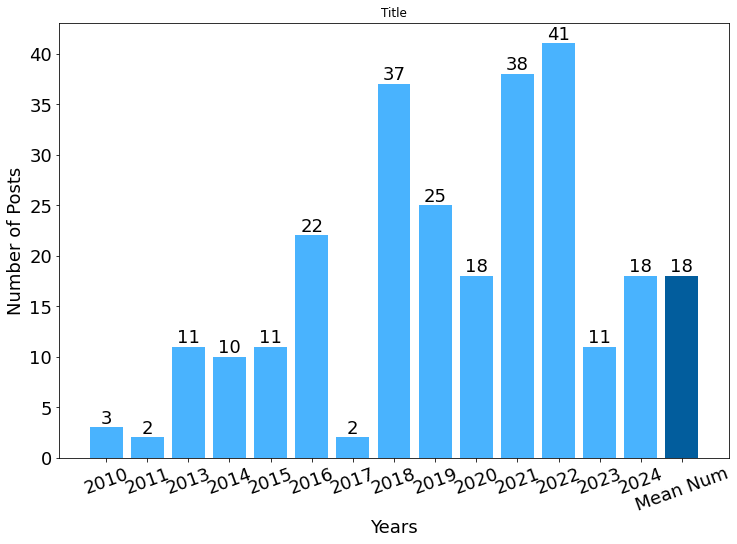

In [23]:
labels = ["2010", "2011", "2013", "2014", "2015", "2016", "2017", 
          "2018", "2019", "2020", "2021", "2022", "2023", "2024", "Mean Num"]
x_list = [3, 2, 11, 10, 11, 22, 2, 37, 25, 18, 38, 41, 11, 18, 18]

# Create bar plot
plt.figure(figsize=(12, 8))


colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe',
         '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#025d9d']


bars = plt.bar(labels, x_list, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize = 18)

# Add title and labels
plt.title("Title")
plt.xlabel("Years", fontsize = 18)
plt.ylabel("Number of Posts", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(rotation=20, fontsize = 18)

# Display the plot
plt.show()


In [18]:
#colors = list(mcolors.TABLEAU_COLORS.values())[:]

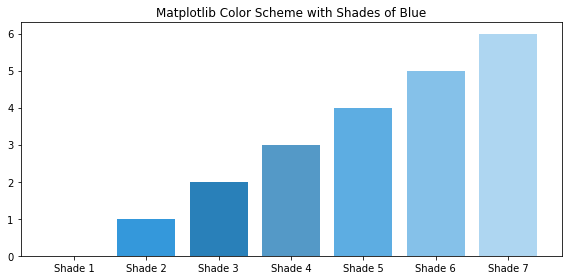

In [33]:
#shades of blue from https://html-color.codes/
colors = ['#1f77b4', '#3498db', '#2980b9', '#5499c7', '#5dade2', '#85c1e9', '#aed6f1']

#show colors on barchart
plt.figure(figsize=(8, 4))
for i, color in enumerate(colors):
    plt.bar(i, i, color=color)

plt.title('Matplotlib Color Scheme with Shades of Blue')
plt.xticks(range(len(colors)), [f'Shade {i+1}' for i in range(len(colors))])
plt.tight_layout()
plt.show()


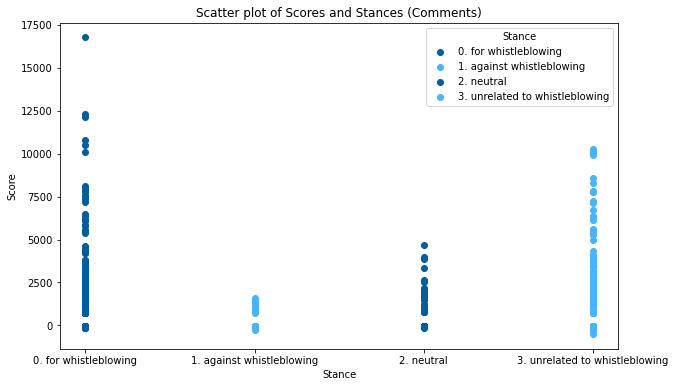

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your existing DataFrame
# df = pd.read_csv('your_file.csv') # if you are reading from a CSV file

# Define shades of blue
colors = ['#025d9d', '#49b3fe', '#025d9d', '#49b3fe']

# Map categorical values to colors
unique_stances = sorted(df['stance comment'].unique())
color_map = {stance: colors[i % len(colors)] for i, stance in enumerate(unique_stances)}

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for stance in unique_stances:
    subset = df[df['stance comment'] == stance]
    plt.scatter([stance]*len(subset), subset['Score'], color=color_map[stance], label=stance)

plt.xlabel('Stance')
plt.ylabel('Score')
plt.legend(title='Stance')
plt.title('Scatter plot of Scores and Stances (Comments)')
#plt.savefig("results/ScatterCommentStanceScores.jpg")

plt.show()




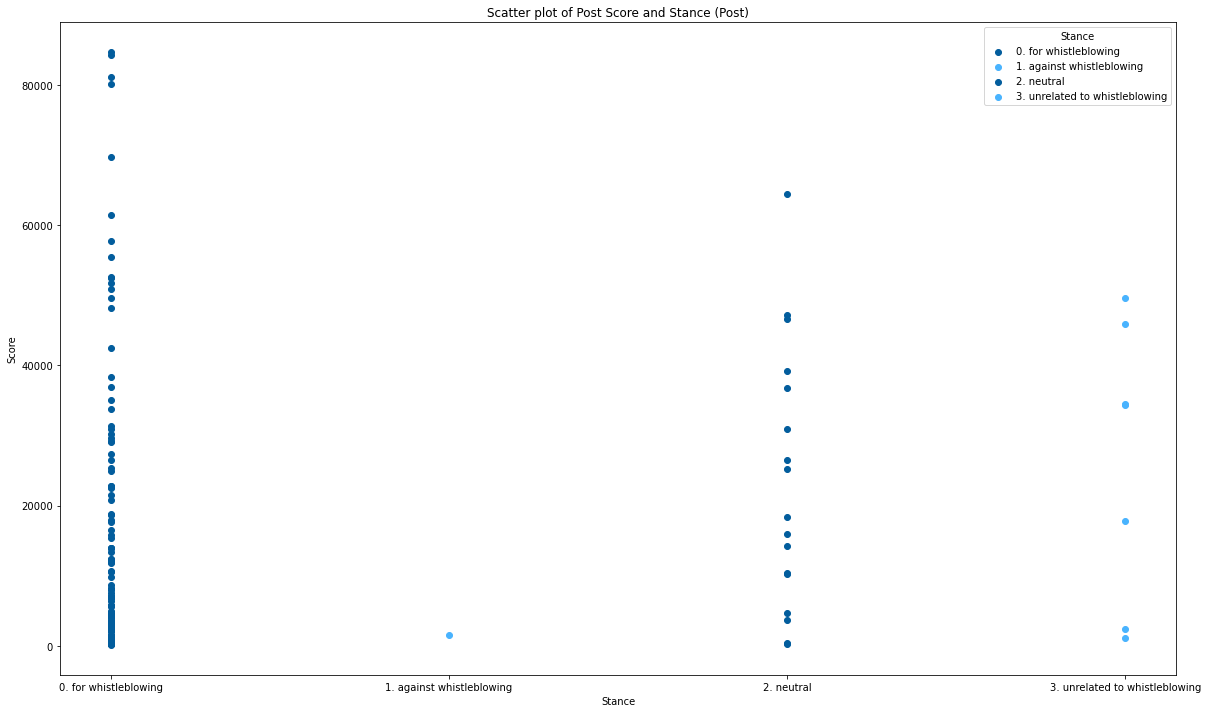

In [34]:
colors = ['#025d9d', '#49b3fe', '#025d9d', '#49b3fe']

#assign categorical values to colors
unique_stances_post = sorted(df_posts['stance post'].unique())
color_map = {stance: colors[i % len(colors)] for i, stance in enumerate(unique_stances_post)}

#plot the scatter plot
plt.figure(figsize=(20, 12))
for stance in unique_stances_post:
    subset = df_posts[df_posts['stance post'] == stance]
    plt.scatter([stance]*len(subset), subset['Post_Score'], color=color_map[stance], label=stance)

plt.xlabel('Stance')
plt.ylabel('Score')
plt.legend(title='Stance')
plt.title('Scatter plot of Post Score and Stance (Post)')
#plt.savefig("results/ScatterPostStanceScores.jpg")
plt.show()



In [29]:
df_posts["stance post"].value_counts()

0. for whistleblowing             107
2. neutral                         17
3. unrelated to whistleblowing      7
1. against whistleblowing           1
Name: stance post, dtype: int64

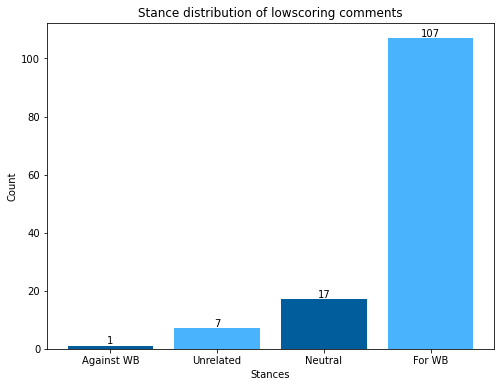

In [294]:
x_list = []

for i in df_posts["stance post"].value_counts():
    x_list.append(i)

x = sorted(x_list)
labels = ['Against WB', 'Unrelated', 'Neutral', 'For WB']

#plot the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

#add the values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )


plt.title('Stance distribution of lowscoring comments')
plt.xlabel('Stances')
plt.ylabel('Count')

#plt.savefig("results/BarStanceLowscoreComments.jpg")

plt.show()


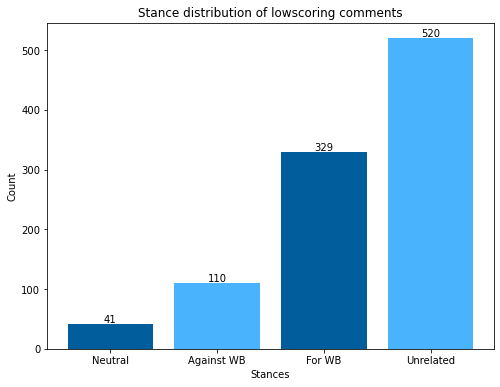

In [28]:
x_list = []

for i in df["stance comment"].value_counts():
    x_list.append(i)

x = sorted(x_list)
labels = ['Neutral', 'Against WB', 'For WB', 'Unrelated']

#bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

#value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )


plt.title('Stance distribution of lowscoring comments')
plt.xlabel('Stances')
plt.ylabel('Count')

#plt.savefig("results/BarStanceLowscoreComments.jpg")


plt.show()


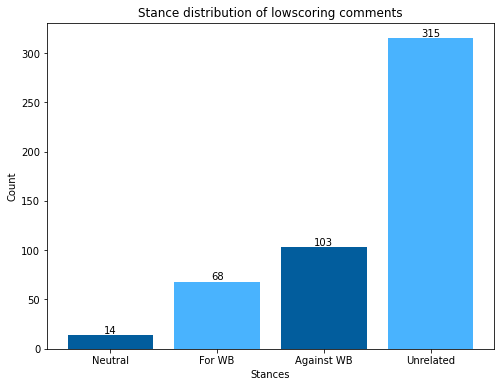

In [155]:
x_list = []

for i in df_lowscore["stance comment"].value_counts():
    x_list.append(i)

x = sorted(x_list)
labels = ['Neutral', 'For WB', 'Against WB', 'Unrelated']

#bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

#value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )


plt.title('Stance distribution of lowscoring comments')
plt.xlabel('Stances')
plt.ylabel('Count')

#plt.savefig("results/BarStanceLowscoreComments.jpg")


plt.show()


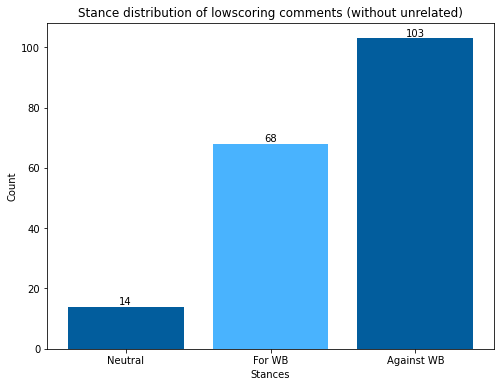

In [156]:
x_list = []

for i in df_lowscore["stance comment"].value_counts():
    x_list.append(i)

x_list = sorted(x_list)
x_list.pop()

x = x_list
labels = ['Neutral', 'For WB', 'Against WB']

#bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

#value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )


plt.title('Stance distribution of lowscoring comments (without unrelated)')
plt.xlabel('Stances')
plt.ylabel('Count')

#plt.savefig("results/BarStanceLowscoreCommentsRelated.jpg")

plt.show()


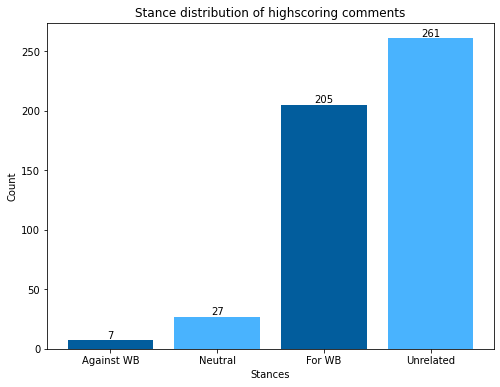

In [157]:
x_list = []
for i in df_highscore["stance comment"].value_counts():
    x_list.append(i)
    

x = sorted(x_list)
labels = ['Against WB', 'Neutral', 'For WB', 'Unrelated']

#bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

#value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )
    

plt.title('Stance distribution of highscoring comments')
plt.xlabel('Stances')
plt.ylabel('Count')

#plt.savefig("results/BarStanceHighscoreComments.jpg")


plt.show()


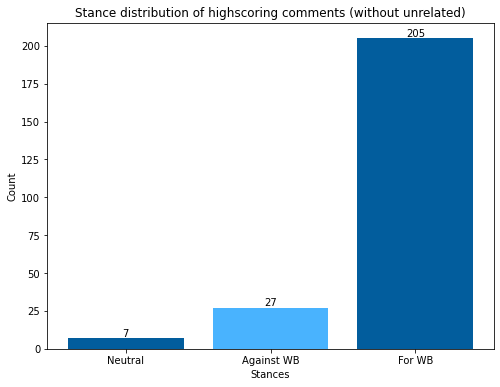

In [158]:
x_list = []

for i in df_highscore["stance comment"].value_counts():
    x_list.append(i)

x_list = sorted(x_list)
x_list.pop()

x = x_list
labels = ['Neutral', 'Against WB', 'For WB']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=['#025d9d', '#49b3fe', '#025d9d', '#49b3fe'])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom'
    )

plt.title('Stance distribution of highscoring comments (without unrelated)')
plt.xlabel('Stances')
plt.ylabel('Count')
    
plt.savefig("results/BarStanceHighscoreCommentsRelated.jpg")

plt.show()


In [108]:
df_0 = df[df["stance comment"] == "0. for whistleblowing"]
df_1 = df[df["stance comment"] == "1. against whistleblowing"]
df_2 = df[df["stance comment"] == "2. neutral"]
df_3 = df[df["stance comment"] == "3. unrelated to whistleblowing"]

dflist = [df_0, df_1, df_2]
x_list = []


for i in dflist:
    x_list.append(i["Score"].mean())
    
x_list.append(df_related["Score"].mean())

sorted(x_list)

[25.272727272727273, 1219.5121951219512, 1345.5208333333333, 1802.644376899696]

In [145]:
df["Score"].min()

-497

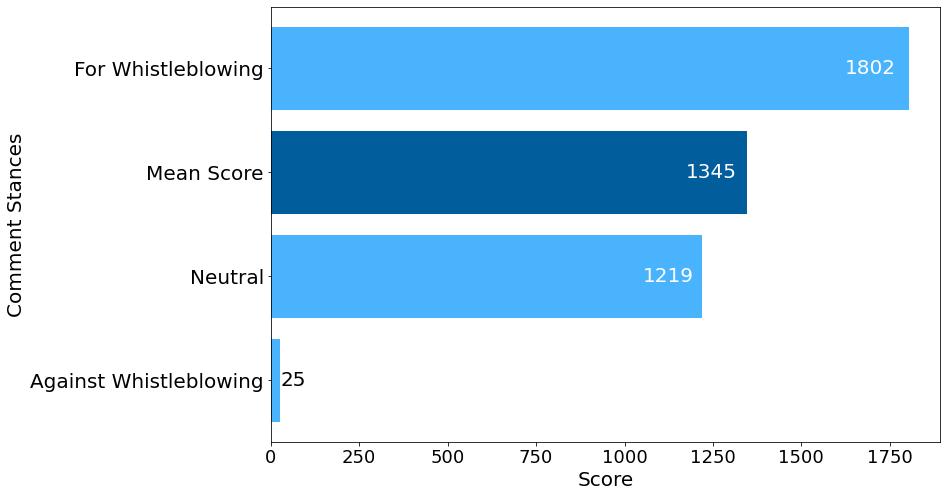

In [57]:
df_0 = df[df["stance comment"] == "0. for whistleblowing"]
df_1 = df[df["stance comment"] == "1. against whistleblowing"]
df_2 = df[df["stance comment"] == "2. neutral"]
df_3 = df[df["stance comment"] == "3. unrelated to whistleblowing"]

#dflist = [df_0, df_1, df_2, df_3]
dflist = [df_0, df_1, df_2]
x_list = []


for i in dflist:
    x_list.append(i["Score"].mean())
    
x_list.append(df_related["Score"].mean())

x_list = sorted(x_list)

x = x_list
#labels = ["Against Whistleblowing", "Unrelated", "Neutral", "Mean Score", "For Whistleblowing"]
labels = ["Against Whistleblowing", "Neutral", "Mean Score", "For Whistleblowing"]


plt.figure(figsize=(12, 8))

#horizontal bar plot
bars = plt.barh(labels, x, color=["#49b3fe", "#49b3fe", "#025d9d", "#49b3fe"])

#text labels inside or outside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    height = bar.get_height()
    
    if i == 0:  #for the fourth bar (index 3)
        #place text outside of the bar
        plt.text(
            width + 0.1 * width,  #slightly to the right of the bar
            bar.get_y() + height / 2.0,
            "%d" % int(width),
            ha="left",  
            va="center",
            fontsize=20,
            color='black'
        )
    else:
        #place text inside the bar
        plt.text(
            width * 0.98,  # 95% of the bar width for positioning text inside
            bar.get_y() + height / 2.0,
            "%d" % int(width),
            ha="right", 
            va="center",
            fontsize=20,
            color='white'
        )

plt.xlabel("Score", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylabel("Comment Stances", fontsize = 20)

#plt.savefig("results/BarMeanScoreCommentsStances.jpg")

plt.show()


In [191]:
df_0_post = df_posts[df_posts["stance post"] == "0. for whistleblowing"]
df_1_post = df_posts[df_posts["stance post"] == "1. against whistleblowing"]
df_2_post = df_posts[df_posts["stance post"] == "2. neutral"]

dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Post_Score"].mean())
    
x_list

[18017.1214953271, 1536.0, 23241.70588235294]

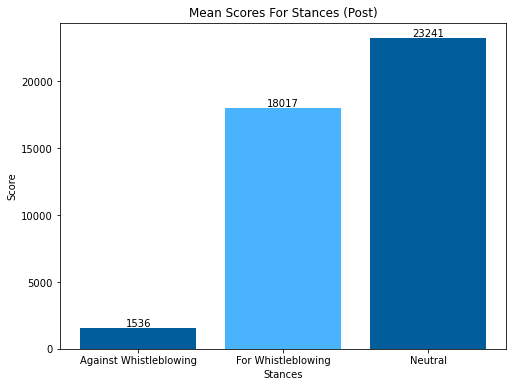

In [178]:
df_0_post = df_posts[df_posts["stance post"] == "0. for whistleblowing"]
df_1_post = df_posts[df_posts["stance post"] == "1. against whistleblowing"]
df_2_post = df_posts[df_posts["stance post"] == "2. neutral"]

dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Post_Score"].mean())

x_list = sorted(x_list)

x = x_list
labels = ["Against Whistleblowing", "For Whistleblowing", "Neutral"]


plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Mean Scores For Stances (Post)")
plt.xlabel("Stances")
plt.ylabel("Score")

#plt.savefig("results/BarMeanScorePostsStances.jpg")

plt.show()


In [185]:
dflist = [df_0, df_1, df_2]

temp_list = []

for i in dflist:
    temp_list.append(i["Score"].max())
    
temp_list

[16762, 1625, 4703]

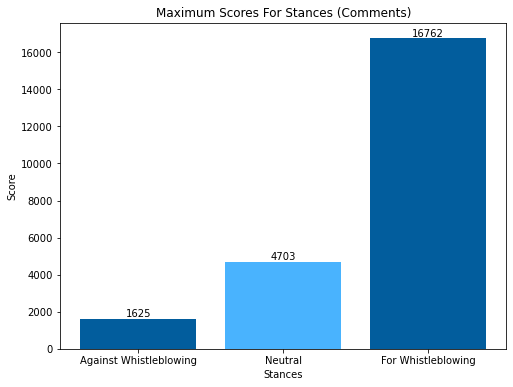

In [179]:
dflist = [df_0, df_1, df_2]
x_list = []


for i in dflist:
    x_list.append(i["Score"].max())

x_list = sorted(x_list)

x = x_list
labels = ["Against Whistleblowing", "Neutral", "For Whistleblowing"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Maximum Scores For Stances (Comments)")
plt.xlabel("Stances")
plt.ylabel("Score")

#plt.savefig("results/BarMaximumScoreCommentsStances.jpg")

plt.show()



In [186]:
dflist = [df_0, df_1, df_2]

temp_list = []

for i in dflist:
    temp_list.append(i["Score"].min())
    
temp_list

[-167, -275, -147]

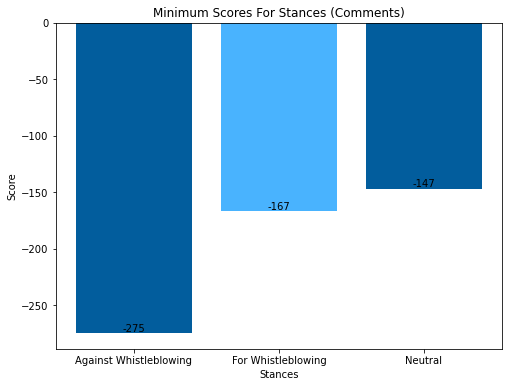

In [184]:
dflist = [df_0, df_1, df_2]
x_list = []


for i in dflist:
    x_list.append(i["Score"].min())

x_list = sorted(x_list)

x = x_list
labels = ["Against Whistleblowing", "For Whistleblowing", "Neutral"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Minimum Scores For Stances (Comments)")
plt.xlabel("Stances")
plt.ylabel("Score")

#plt.savefig("results/BarMinimumScoreCommentsStances.jpg")

plt.show()



In [205]:
df_0_post = df_posts[df_posts["stance post"] == "0. for whistleblowing"]
df_1_post = df_posts[df_posts["stance post"] == "1. against whistleblowing"]
df_2_post = df_posts[df_posts["stance post"] == "2. neutral"]

dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Num_Comments"].min())
    
x_list

[13, 284, 14]

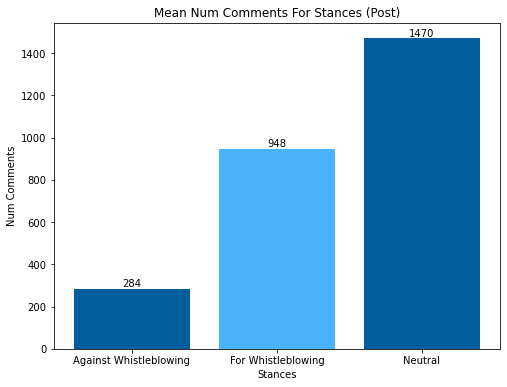

In [200]:
dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Num_Comments"].mean())

x_list = sorted(x_list)

x = x_list
labels = ["Against Whistleblowing", "For Whistleblowing", "Neutral"]


plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Mean Num Comments For Stances (Post)")
plt.xlabel("Stances")
plt.ylabel("Num Comments")

#plt.savefig("results/BarMeanNumComsPostsStances.jpg")

plt.show()

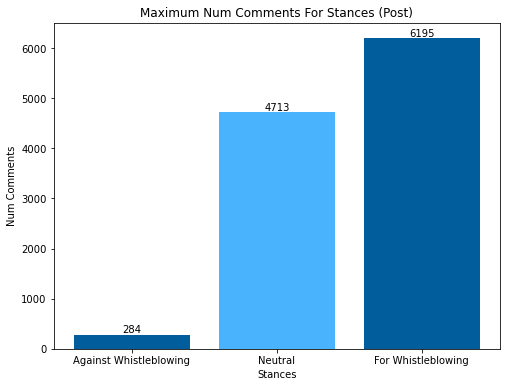

In [204]:
dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Num_Comments"].max())

x_list = sorted(x_list)

x = x_list
labels = ["Against Whistleblowing", "Neutral", "For Whistleblowing"]


plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Maximum Num Comments For Stances (Post)")
plt.xlabel("Stances")
plt.ylabel("Num Comments")

#plt.savefig("results/BarMaxNumComsPostsStances.jpg")

plt.show()

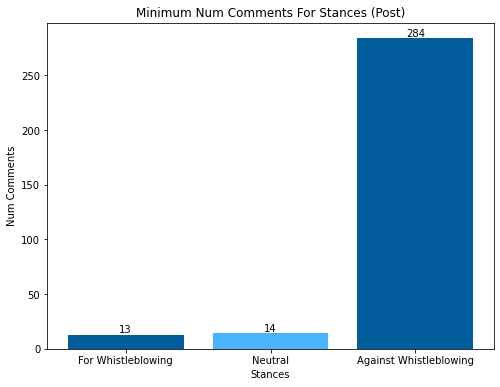

In [206]:
dflist = [df_0_post, df_1_post, df_2_post]
x_list = []


for i in dflist:
    x_list.append(i["Num_Comments"].min())

x_list = sorted(x_list)

x = x_list
labels = ["For Whistleblowing", "Neutral", "Against Whistleblowing"]


plt.figure(figsize=(8, 6))
bars = plt.bar(labels, x, color=["#025d9d", "#49b3fe", "#025d9d", "#49b3fe"])


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%d" % int(height),
        ha="center",
        va="bottom"
    )


plt.title("Minimum Num Comments For Stances (Post)")
plt.xlabel("Stances")
plt.ylabel("Num Comments")

#plt.savefig("results/BarMinimumNumComsPostsStances.jpg")

plt.show()

In [196]:
len(df_0_post)

107

In [98]:
value_counts_dict1_post = df_posts["ethical issue label post 1"].value_counts().to_dict()
value_counts_dict2_post = df_posts["ethical issue label post 2"].value_counts().to_dict()

d1 = value_counts_dict1_post
d2 = value_counts_dict2_post

merged_dict = Counter(d1) + Counter(d2)

label_dict_post = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True))

#with open("results/issues_dict_post.txt", 'w') as file:
#    for key, value in label_dict_post.items():
#        file.write(f'{key}: {value}\n')


print(label_dict_post)

{'0. privacy': 64, '5. manipulation': 53, '13. only one issue': 45, '9. whistleblower retaliation': 32, '3. discrimination': 24, '7. safety': 17, '11. unrelated': 14, '4. misinformation': 7, '1. content moderation': 4, '6. cybersecurity': 3, '2. addiction': 1}


In [99]:
value_counts_dict1 = df["ethical issue label comment 1"].value_counts().to_dict()
value_counts_dict2 = df["ethical issue label comment 2"].value_counts().to_dict()

d1 = value_counts_dict1
d2 = value_counts_dict2

merged_dict = Counter(d1) + Counter(d2)

result_dict = dict(sorted(merged_dict.items(), key=lambda item: item[1], reverse=True))

#with open("results/issues_dict_comments.txt", 'w') as file:
#    for key, value in result_dict.items():
#        file.write(f'{key}: {value}\n')


print(result_dict)

{'11. unrelated': 1078, '13. only one issue': 251, '5. manipulation': 175, '9. whistleblower retaliation': 141, '0. privacy': 137, '3. discrimination': 94, '7. safety': 77, '1. content moderation': 24, '4. misinformation': 19, '6. cybersecurity': 3, '2. addiction': 1}


In [100]:
def ethical_label_df(data, ethical_issue):
    
    if data == "comment":
        df_issue1 = df[df["ethical issue label comment 1"] == ethical_issue]
        df_issue2 = df[df["ethical issue label comment 2"] == ethical_issue]
        
    if data == "post_full":
        df_issue1 = df[df["ethical issue label post 1"] == ethical_issue]
        df_issue2 = df[df["ethical issue label post 2"] == ethical_issue]    
        
    elif data == "post":
        df_issue1 = df_posts[df_posts["ethical issue label post 1"] == ethical_issue]
        df_issue2 = df_posts[df_posts["ethical issue label post 2"] == ethical_issue]
    
    concat_issue = pd.concat([df_issue1, df_issue2], ignore_index = True)
    
    return concat_issue

In [101]:
ethical_label_df("post", "9. whistleblower retaliation")

,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment
0,1bcf9rh,Boeing whistleblower found dead in US in appar...,https://www.bbc.com/news/business-68534703,kuftd3m,57680,4363,"Going nowhere, Boeing has so many military con...",1182,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing
1,1ckf50x,Boeing faces ten more whistleblowers after sud...,https://www.hindustantimes.com/world-news/us-n...,l2mik4b,48192,1896,Some hitman is gonna be able to send his kids ...,2903,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing
2,moliff,She sued for pregnancy discrimination. Now she...,https://www.theguardian.com/technology/2021/ap...,gu53mim,25387,2037,Toddlers don’t understand what litigation is. ...,-32,technology,1. article about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,1. against whistleblowing
3,oitv8y,"Home, but Not Free: NSA Whistleblower Reality ...",https://theintercept.com/2021/07/10/reality-wi...,h4xwn8x,227,68,"Republicans are the ""people"" you are referring...",-40,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing
4,k8suwj,Florida State Police Raid Home Of COVID Whistl...,https://www.techdirt.com/articles/20201207/145...,gf0lmhs,80109,2935,If you think this is a totalitarian regime you...,-29,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,5. manipulation,2. neutral
5,i54g2o,Facebook Fired An Employee Who Collected Evide...,https://www.buzzfeednews.com/article/craigsilv...,g0n2y2d,61405,2369,Lol fake news,-33,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,0. general comment about whistleblower,4. misinformation,13. only one issue,1. against whistleblowing
6,5tzvfp,After Passing Worst Surveillance Law In A Demo...,https://www.techdirt.com/articles/20170213/084...,ddqme49,20793,1057,"""I'm not planning on setting my house on fire....",726,technology,1. article about whistleblower,9. whistleblower retaliation,0. privacy,0. for whistleblowing,0. general comment about whistleblower,0. privacy,13. only one issue,0. for whistleblowing
7,lcc5dv,Two Google engineers resign over firing of AI ...,https://www.reuters.com/article/us-alphabet-re...,glzksuz,50867,2137,"Google, like many tech companies, is notorious...",-37,technology,1. article about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing
8,1c76uka,Boeing whistleblower claims there is a 'crimin...,https://www.businessinsider.com/boeing-whistle...,l05sky5,18749,712,Ed Pierson was a senior manager at Boeing's 73...,2111,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,7. safety,13. only one issue,0. for whistleblowing
9,k9hkkk,COVID-19 data whistleblower could face up to 5...,https://www.sun-sentinel.com/news/politics/fl-...,gf4i1bg,49547,3935,Everybody involved with Epstein’s case has big...,3082,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whi

In [102]:
df_retal_comment = ethical_label_df("comment", "9. whistleblower retaliation")
df_manip_comment = ethical_label_df("comment","5. manipulation")
df_priv_comment = ethical_label_df("comment","0. privacy")
df_disc_comment = ethical_label_df("comment","3. discrimination")
df_safety_comment = ethical_label_df("comment","7. safety")
df_contmod_comment = ethical_label_df("comment","1. content moderation")
df_misinfo_comment = ethical_label_df("comment","4. misinformation")
df_algbias_comment = ethical_label_df("comment","8. algorithmic bias")
df_cybsec_comment = ethical_label_df("comment","6. cybersecurity")
df_addict_comment = ethical_label_df("comment","2. addiction")

In [197]:
label_score_dict = {"Retal. " + "(" + str(len(df_retal_comment)) + ")":df_retal_comment["Score"].mean(),
                    "Manip. " + "(" + str(len(df_manip_comment))+ ")":df_manip_comment["Score"].mean(), 
                    "Privacy " + "(" + str(len(df_priv_comment))+ ")":df_priv_comment["Score"].mean(), 
                    "Discrim. " + "(" + str(len(df_disc_comment))+ ")": df_disc_comment["Score"].mean(), 
                    "Safety " + "(" + str(len(df_safety_comment))+ ")":df_safety_comment["Score"].mean(),
                   "ContMod. " + "(" + str(len(df_contmod_comment))+ ")":df_contmod_comment["Score"].mean(), 
                    "Misinfo. " + "(" + str(len(df_misinfo_comment))+ ")":df_misinfo_comment["Score"].mean(),
                    "CybSec. " + "(" + str(len(df_cybsec_comment))+ ")":df_cybsec_comment["Score"].mean(),
                   "Addiction " + "(" + str(len(df_addict_comment))+ ")":df_addict_comment["Score"].mean()}

label_score_dict = dict(sorted(label_score_dict.items(), key=lambda item: item[1], reverse=True))

#with open("results/ethical_labels_scores.txt", 'w') as file:
#    for key, value in label_score_dict.items():
#        file.write(f'{key}: {value}\n')
        

label_score_dict

{'Safety (77)': 1883.2727272727273,
 'Manip. (175)': 1543.92,
 'Discrim. (94)': 1497.4255319148936,
 'Addiction (1)': 1325.0,
 'Retal. (141)': 1323.1560283687943,
 'ContMod. (24)': 1109.8333333333333,
 'Privacy (137)': 899.0948905109489,
 'Misinfo. (19)': 686.421052631579,
 'CybSec. (3)': 224.0}

In [104]:
df_retal_post = ethical_label_df("post", "9. whistleblower retaliation")
df_manip_post = ethical_label_df("post", "5. manipulation")
df_priv_post = ethical_label_df("post", "0. privacy")
df_disc_post = ethical_label_df("post", "3. discrimination")
df_safety_post = ethical_label_df("post", "7. safety")
df_contmod_post = ethical_label_df("post", "1. content moderation")
df_misinfo_post = ethical_label_df("post", "4. misinformation")
df_algbias_post = ethical_label_df("post", "8. algorithmic bias")
df_cybsec_post = ethical_label_df("post", "6. cybersecurity")
df_addict_post = ethical_label_df("post", "2. addiction")

In [106]:
label_score_dict_post = {"Retal. " + "(" + str(len(df_retal_post)) + ")":df_retal_post["Post_Score"].mean(), 
                         "Manip. " + "(" + str(len(df_manip_post)) + ")":df_manip_post["Post_Score"].mean(), 
                         "Privacy " + "(" + str(len(df_priv_post)) + ")":df_priv_post["Post_Score"].mean(), 
                         "Discrim. " + "(" + str(len(df_disc_post)) + ")": df_disc_post["Post_Score"].mean(),
                         "Safety " + "(" + str(len(df_safety_post)) + ")":df_safety_post["Post_Score"].mean(), 
                         "ContMod. " + "(" + str(len(df_contmod_post)) + ")":df_contmod_post["Post_Score"].mean(),
                         "Misinfo. " + "(" + str(len(df_misinfo_post)) + ")":df_misinfo_post["Post_Score"].mean(),  
                         "CybSec. " + "(" +  str(len(df_cybsec_post)) + ")":df_cybsec_post["Post_Score"].mean(), 
                         "Addiction " + "(" + str(len(df_addict_post)) + ")":df_addict_post["Post_Score"].mean()}

label_score_dict_post = dict(sorted(label_score_dict_post.items(), key=lambda item: item[1], reverse=True))

#with open("results/ethical_labels_scores.txt", 'w') as file:
#    for key, value in label_score_dict.items():
#        file.write(f'{key}: {value}\n')
        

label_score_dict_post

{'ContMod. (4)': 42588.75,
 'Discrim. (24)': 24277.416666666668,
 'Manip. (53)': 21855.77358490566,
 'Retal. (32)': 21518.625,
 'Misinfo. (7)': 21310.85714285714,
 'Safety (17)': 21056.647058823528,
 'Privacy (64)': 12208.125,
 'CybSec. (3)': 6618.333333333333,
 'Addiction (1)': 1493.0}

In [108]:
label_numcom_dict_post = {"Retal. " + "\n" + "(" +  str(len(df_retal_post)) + ")":df_retal_post["Num_Comments"].mean(), 
                         "Manip. " + "\n" + "(" +  str(len(df_manip_post)) + ")":df_manip_post["Num_Comments"].mean(), 
                         "Privacy " + "\n" + "(" +  str(len(df_priv_post)) + ")":df_priv_post["Num_Comments"].mean(), 
                         "Discrim. " + "\n" + "(" +  str(len(df_disc_post)) + ")":df_disc_post["Num_Comments"].mean(),
                         "Safety " + "\n" + "(" +  str(len(df_safety_post)) + ")":df_safety_post["Num_Comments"].mean(), 
                         "ContMod. " + "\n" + "(" +  str(len(df_contmod_post)) + ")":df_contmod_post["Num_Comments"].mean(),
                         "Misinfo. " + "\n" + "(" +  str(len(df_misinfo_post)) + ")":df_misinfo_post["Num_Comments"].mean(), 
                         "CybSec. " + "\n" + "(" +  str(len(df_cybsec_post)) + ")":df_cybsec_post["Num_Comments"].mean(), 
                         "Addiction " + "\n" + "(" +  str(len(df_addict_post)) + ")":df_addict_post["Num_Comments"].mean()}

label_numcom_dict_post = dict(sorted(label_numcom_dict_post.items(), key=lambda item: item[1], reverse=True))

#with open("results/ethical_labels_scores.txt", 'w') as file:
#    for key, value in label_score_dict.items():
#        file.write(f'{key}: {value}\n')
        

label_numcom_dict_post

{'ContMod. \n(4)': 2633.0,
 'Discrim. \n(24)': 1405.0416666666667,
 'Safety \n(17)': 1280.8235294117646,
 'Retal. \n(32)': 1237.21875,
 'Manip. \n(53)': 1001.3207547169811,
 'Misinfo. \n(7)': 896.5714285714286,
 'Privacy \n(64)': 650.671875,
 'CybSec. \n(3)': 331.0,
 'Addiction \n(1)': 219.0}

In [109]:
df_retal_post

,Post_ID,Post_Title,Post_URL,Comment_ID,Post_Score,Num_Comments,Body,Score,Subreddit,type label post,ethical issue label post 1,ethical issue label post 2,stance post,type label comment,ethical issue label comment 1,ethical issue label comment 2,stance comment
0,1bcf9rh,Boeing whistleblower found dead in US in appar...,https://www.bbc.com/news/business-68534703,kuftd3m,57680,4363,"Going nowhere, Boeing has so many military con...",1182,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing
1,1ckf50x,Boeing faces ten more whistleblowers after sud...,https://www.hindustantimes.com/world-news/us-n...,l2mik4b,48192,1896,Some hitman is gonna be able to send his kids ...,2903,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,0. for whistleblowing
2,moliff,She sued for pregnancy discrimination. Now she...,https://www.theguardian.com/technology/2021/ap...,gu53mim,25387,2037,Toddlers don’t understand what litigation is. ...,-32,technology,1. article about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,13. only one issue,1. against whistleblowing
3,oitv8y,"Home, but Not Free: NSA Whistleblower Reality ...",https://theintercept.com/2021/07/10/reality-wi...,h4xwn8x,227,68,"Republicans are the ""people"" you are referring...",-40,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,2. unrelated to whistleblowing,11. unrelated,11. unrelated,3. unrelated to whistleblowing
4,k8suwj,Florida State Police Raid Home Of COVID Whistl...,https://www.techdirt.com/articles/20201207/145...,gf0lmhs,80109,2935,If you think this is a totalitarian regime you...,-29,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,5. manipulation,2. neutral
5,i54g2o,Facebook Fired An Employee Who Collected Evide...,https://www.buzzfeednews.com/article/craigsilv...,g0n2y2d,61405,2369,Lol fake news,-33,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whistleblowing,0. general comment about whistleblower,4. misinformation,13. only one issue,1. against whistleblowing
6,5tzvfp,After Passing Worst Surveillance Law In A Demo...,https://www.techdirt.com/articles/20170213/084...,ddqme49,20793,1057,"""I'm not planning on setting my house on fire....",726,technology,1. article about whistleblower,9. whistleblower retaliation,0. privacy,0. for whistleblowing,0. general comment about whistleblower,0. privacy,13. only one issue,0. for whistleblowing
7,lcc5dv,Two Google engineers resign over firing of AI ...,https://www.reuters.com/article/us-alphabet-re...,glzksuz,50867,2137,"Google, like many tech companies, is notorious...",-37,technology,1. article about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing,0. general comment about whistleblower,9. whistleblower retaliation,3. discrimination,0. for whistleblowing
8,1c76uka,Boeing whistleblower claims there is a 'crimin...,https://www.businessinsider.com/boeing-whistle...,l05sky5,18749,712,Ed Pierson was a senior manager at Boeing's 73...,2111,technology,1. article about whistleblower,9. whistleblower retaliation,7. safety,0. for whistleblowing,0. general comment about whistleblower,7. safety,13. only one issue,0. for whistleblowing
9,k9hkkk,COVID-19 data whistleblower could face up to 5...,https://www.sun-sentinel.com/news/politics/fl-...,gf4i1bg,49547,3935,Everybody involved with Epstein’s case has big...,3082,technology,1. article about whistleblower,9. whistleblower retaliation,5. manipulation,0. for whi

In [110]:
def unrelated_comment(df):
    df = df[df["type label comment"] == "2. unrelated to whistleblowing"]
    
    return df

In [111]:
df["ethical issue label comment 1"].value_counts()

11. unrelated                   539
9. whistleblower retaliation    123
5. manipulation                 100
0. privacy                       91
3. discrimination                63
7. safety                        57
1. content moderation            21
4. misinformation                 5
2. addiction                      1
Name: ethical issue label comment 1, dtype: int64

In [112]:
df_full_privacy = ethical_label_df("post_full", "0. privacy")
df_unrelated_privacy = unrelated_comment(df_full_privacy)
df_full_retal = ethical_label_df("post_full", "9. whistleblower retaliation")
df_unrelated_retal = unrelated_comment(df_full_retal)
df_full_manipulation = ethical_label_df("post_full", "5. manipulation")
df_unrelated_manipulation = unrelated_comment(df_full_manipulation)
df_full_safety = ethical_label_df("post_full", "7. safety")
df_unrelated_safety = df_unrelated_safety = unrelated_comment(df_full_safety)
df_full_content = ethical_label_df("post_full", "1. content moderation")
df_unrelated_content = df_unrelated_content = unrelated_comment(df_full_content)
df_full_discrim = ethical_label_df("post_full", "3. discrimination")
df_full_misinfo = ethical_label_df("post_full", "4. misinformation")
df_full_cybsec = ethical_label_df("post_full", "6. cybersecurity")
df_full_addiction = ethical_label_df("post_full", "2. addiction")
df_full_algbias =  ethical_label_df("post_full", "8. algorithmic bias")

In [113]:
len(df_full_addiction[df_full_addiction["stance comment"] == "1. against whistleblowing"])

0

In [114]:
def comment_stances(df, stance):
    df = df[df["stance comment"] == stance]
    
    return df

In [115]:
#for
df_full_retal_pos = comment_stances(df_full_retal, "0. for whistleblowing")
df_full_privacy_pos = comment_stances(df_full_privacy, "0. for whistleblowing")
df_full_manipulation_pos = comment_stances(df_full_manipulation, "0. for whistleblowing")
df_full_safety_pos = comment_stances(df_full_safety, "0. for whistleblowing")
df_full_content_pos = comment_stances(df_full_content, "0. for whistleblowing")
df_full_discrim_pos = comment_stances(df_full_discrim, "0. for whistleblowing")
df_full_misinfo_pos = comment_stances(df_full_misinfo, "0. for whistleblowing")
df_full_cybsec_pos = comment_stances(df_full_cybsec, "0. for whistleblowing")
df_full_addiction_pos = comment_stances(df_full_addiction, "0. for whistleblowing")
df_full_algbias_pos = comment_stances(df_full_algbias, "0. for whistleblowing")

#against
df_full_retal_neg = comment_stances(df_full_retal, "1. against whistleblowing")
df_full_privacy_neg = comment_stances(df_full_privacy, "1. against whistleblowing")
df_full_manipulation_neg = comment_stances(df_full_manipulation, "1. against whistleblowing")
df_full_safety_neg = comment_stances(df_full_safety, "1. against whistleblowing")
df_full_content_neg = comment_stances(df_full_content, "1. against whistleblowing")
df_full_discrim_neg = comment_stances(df_full_discrim, "1. against whistleblowing")
df_full_misinfo_neg = comment_stances(df_full_misinfo, "1. against whistleblowing")
df_full_cybsec_neg = comment_stances(df_full_cybsec, "1. against whistleblowing")
df_full_addiction_neg = comment_stances(df_full_addiction, "1. against whistleblowing")
df_full_algbias_neg = comment_stances(df_full_algbias, "1. against whistleblowing")

#neutral
df_full_retal_neutral = comment_stances(df_full_retal, "2. neutral")
df_full_privacy_neutral = comment_stances(df_full_privacy, "2. neutral")
df_full_manipulation_neutral = comment_stances(df_full_manipulation, "2. neutral")
df_full_safety_neutral = comment_stances(df_full_safety, "2. neutral")
df_full_content_neutral = comment_stances(df_full_content, "2. neutral")
df_full_discrim_neutral = comment_stances(df_full_discrim, "2. neutral")
df_full_misinfo_neutral = comment_stances(df_full_misinfo, "2. neutral")
df_full_cybsec_neutral = comment_stances(df_full_cybsec, "2. neutral")
df_full_addiction_neutral = comment_stances(df_full_addiction, "2. neutral")
df_full_algbias_neutral = comment_stances(df_full_algbias, "2. neutral")

#unrelated
df_full_retal_unrelated = comment_stances(df_full_retal, "3. unrelated to whistleblowing")
df_full_privacy_unrelated = comment_stances(df_full_privacy, "3. unrelated to whistleblowing")
df_full_manipulation_unrelated = comment_stances(df_full_manipulation, "3. unrelated to whistleblowing")
df_full_safety_unrelated = comment_stances(df_full_safety, "3. unrelated to whistleblowing")
df_full_content_unrelated = comment_stances(df_full_content, "3. unrelated to whistleblowing")
df_full_discrim_unrelated = comment_stances(df_full_discrim, "3. unrelated to whistleblowing")
df_full_misinfo_unrelated = comment_stances(df_full_misinfo, "3. unrelated to whistleblowing")
df_full_cybsec_unrelated = comment_stances(df_full_cybsec, "3. unrelated to whistleblowing")
df_full_addiction_unrelated = comment_stances(df_full_addiction, "3. unrelated to whistleblowing")
df_full_algbias_unrelated = comment_stances(df_full_algbias, "3. unrelated to whistleblowing")


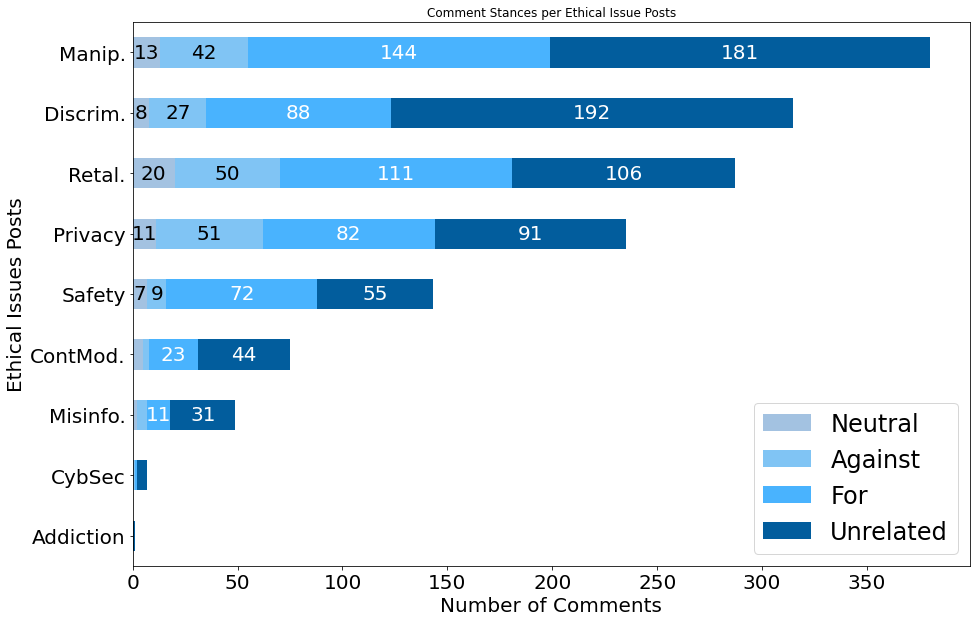

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

data_dict = {
    'Retal.': {'Neutral': len(df_full_retal_neutral), 'Against': len(df_full_retal_neg), 'For': len(df_full_retal_pos), 'Unrelated': len(df_full_retal_unrelated)},
    'Privacy': {'Neutral': len(df_full_privacy_neutral), 'Against': len(df_full_privacy_neg), 'For': len(df_full_privacy_pos), 'Unrelated': len(df_full_privacy_unrelated)},
    'Manip.': {'Neutral': len(df_full_manipulation_neutral), 'Against': len(df_full_manipulation_neg), 'For': len(df_full_manipulation_pos), 'Unrelated': len(df_full_manipulation_unrelated)},
    'Safety': {'Neutral': len(df_full_safety_neutral), 'Against': len(df_full_safety_neg), 'For': len(df_full_safety_pos), 'Unrelated': len(df_full_safety_unrelated)},
    'ContMod.': {'Neutral': len(df_full_content_neutral), 'Against': len(df_full_content_neg), 'For': len(df_full_content_pos), 'Unrelated': len(df_full_content_unrelated)},
    'Discrim.': {'Neutral': len(df_full_discrim_neutral), 'Against': len(df_full_discrim_neg), 'For': len(df_full_discrim_pos), 'Unrelated': len(df_full_discrim_unrelated)},
    'Misinfo.': {'Neutral': len(df_full_misinfo_neutral), 'Against': len(df_full_misinfo_neg), 'For': len(df_full_misinfo_pos), 'Unrelated': len(df_full_misinfo_unrelated)},
    'CybSec': {'Neutral': len(df_full_cybsec_neutral), 'Against': len(df_full_cybsec_neg), 'For': len(df_full_cybsec_pos), 'Unrelated': len(df_full_cybsec_unrelated)},
    'Addiction': {'Neutral': len(df_full_addiction_neutral), 'Against': len(df_full_addiction_neg), 'For': len(df_full_addiction_pos), 'Unrelated': len(df_full_addiction_unrelated)},
}

#from dict to dataframe
df_chart = pd.DataFrame(data_dict).T

#calculate total width
df_chart['Total'] = df_chart.sum(axis=1)

#sort the bars by total width
df_chart_sorted = df_chart.sort_values(by='Total', ascending=True).drop(columns='Total')

colors = {
    'Neutral': '#a3c2e1',   #dark blue
    'Against': '#80c4f4',   #light blue
    'For': '#49b3fe',       #lighter blue
    'Unrelated': '#025d9d'  #lightest blue
}

#horizontal bar plot
ax = df_chart_sorted.plot(kind='barh', stacked=True, figsize=(15, 10), color=[colors['Neutral'], colors['Against'], colors['For'], colors['Unrelated']])

#place text on the bars
for i, (row_name, row) in enumerate(df_chart_sorted.iterrows()):
    cumulative_sum = 0
    for j, (category, value) in enumerate(row.items()):
        cumulative_sum += value
        if value > 5:  #display text only if the value is greater
            text_color = 'black' if category in ['Neutral', 'Against'] else 'white'
            ax.text(
                cumulative_sum - value / 2,
                i,
                str(value),
                va='center',
                ha='center',
                fontsize=20,
                color=text_color
            )

plt.xlabel('Number of Comments', fontsize=20)
plt.ylabel('Ethical Issues Posts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='lower right', fontsize=24)
plt.title('Comment Stances per Ethical Issue Posts')
plt.show()


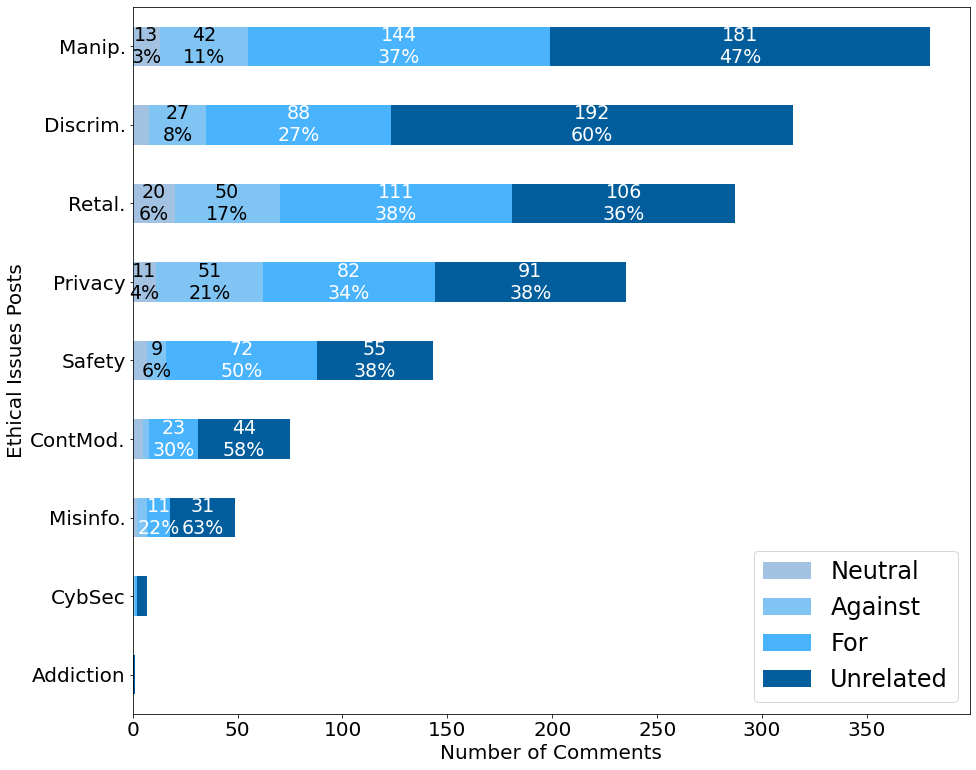

In [228]:
data_dict = {
    'Retal.': {
        'Neutral': (len(df_full_retal_neutral), get_percent(df_full_retal_neutral, df_full_retal)),
        'Against': (len(df_full_retal_neg), get_percent(df_full_retal_neg, df_full_retal)),
        'For': (len(df_full_retal_pos), get_percent(df_full_retal_pos, df_full_retal)),
        'Unrelated': (len(df_full_retal_unrelated), get_percent(df_full_retal_unrelated, df_full_retal))
    },
    'Privacy': {
        'Neutral': (len(df_full_privacy_neutral), get_percent(df_full_privacy_neutral, df_full_privacy)),
        'Against': (len(df_full_privacy_neg), get_percent(df_full_privacy_neg, df_full_privacy)),
        'For': (len(df_full_privacy_pos), get_percent(df_full_privacy_pos, df_full_privacy)),
        'Unrelated': (len(df_full_privacy_unrelated), get_percent(df_full_privacy_unrelated, df_full_privacy))
    },
    'Manip.': {
        'Neutral': (len(df_full_manipulation_neutral), get_percent(df_full_manipulation_neutral, df_full_manipulation)),
        'Against': (len(df_full_manipulation_neg), get_percent(df_full_manipulation_neg, df_full_manipulation)),
        'For': (len(df_full_manipulation_pos), get_percent(df_full_manipulation_pos, df_full_manipulation)),
        'Unrelated': (len(df_full_manipulation_unrelated), get_percent(df_full_manipulation_unrelated, df_full_manipulation))
    },
    'Safety': {
        'Neutral': (len(df_full_safety_neutral), get_percent(df_full_safety_neutral, df_full_safety)),
        'Against': (len(df_full_safety_neg), get_percent(df_full_safety_neg, df_full_safety)),
        'For': (len(df_full_safety_pos), get_percent(df_full_safety_pos, df_full_safety)),
        'Unrelated': (len(df_full_safety_unrelated), get_percent(df_full_safety_unrelated, df_full_safety))
    },
    'ContMod.': {
        'Neutral': (len(df_full_content_neutral), get_percent(df_full_content_neutral, df_full_content)),
        'Against': (len(df_full_content_neg), get_percent(df_full_content_neg, df_full_content)),
        'For': (len(df_full_content_pos), get_percent(df_full_content_pos, df_full_content)),
        'Unrelated': (len(df_full_content_unrelated), get_percent(df_full_content_unrelated, df_full_content))
    },
    'Discrim.': {
        'Neutral': (len(df_full_discrim_neutral), get_percent(df_full_discrim_neutral, df_full_discrim)),
        'Against': (len(df_full_discrim_neg), get_percent(df_full_discrim_neg, df_full_discrim)),
        'For': (len(df_full_discrim_pos), get_percent(df_full_discrim_pos, df_full_discrim)),
        'Unrelated': (len(df_full_discrim_unrelated), get_percent(df_full_discrim_unrelated, df_full_discrim))
    },
    'Misinfo.': {
        'Neutral': (len(df_full_misinfo_neutral), get_percent(df_full_misinfo_neutral, df_full_misinfo)),
        'Against': (len(df_full_misinfo_neg), get_percent(df_full_misinfo_neg, df_full_misinfo)),
        'For': (len(df_full_misinfo_pos), get_percent(df_full_misinfo_pos, df_full_misinfo)),
        'Unrelated': (len(df_full_misinfo_unrelated), get_percent(df_full_misinfo_unrelated, df_full_misinfo))
    },
    'CybSec': {
        'Neutral': (len(df_full_cybsec_neutral), get_percent(df_full_cybsec_neutral, df_full_cybsec)),
        'Against': (len(df_full_cybsec_neg), get_percent(df_full_cybsec_neg, df_full_cybsec)),
        'For': (len(df_full_cybsec_pos), get_percent(df_full_cybsec_pos, df_full_cybsec)),
        'Unrelated': (len(df_full_cybsec_unrelated), get_percent(df_full_cybsec_unrelated, df_full_cybsec))
    },
    'Addiction': {
        'Neutral': (len(df_full_addiction_neutral), get_percent(df_full_addiction_neutral, df_full_addiction)),
        'Against': (len(df_full_addiction_neg), get_percent(df_full_addiction_neg, df_full_addiction)),
        'For': (len(df_full_addiction_pos), get_percent(df_full_addiction_pos, df_full_addiction)),
        'Unrelated': (len(df_full_addiction_unrelated), get_percent(df_full_addiction_unrelated, df_full_addiction))
    }
}

# Convert data_dict to DataFrame for plotting
df_chart = pd.DataFrame({k: {sk: v[0] for sk, v in d.items()} for k, d in data_dict.items()}).T
df_chart['Total'] = df_chart.sum(axis=1)
df_chart_sorted = df_chart.sort_values(by='Total', ascending=True).drop(columns='Total')

colors = {
    'Neutral': '#a3c2e1',   # dark blue
    'Against': '#80c4f4',   # light blue
    'For': '#49b3fe',       # lighter blue
    'Unrelated': '#025d9d'  # lightest blue
}

# Stacked horizontal bar plot
ax = df_chart_sorted.plot(kind='barh', stacked=True, figsize=(15, 13), color=[colors['Neutral'], colors['Against'], colors['For'], colors['Unrelated']])

# Adding count and percentage text
for i, (row_name, row) in enumerate(df_chart_sorted.iterrows()):
    cumulative_sum = 0
    for j, (category, value) in enumerate(row.items()):
        cumulative_sum += value
        if value > 8:  # Display text only if the value is greater than 5
            text_color = 'black' if category in ['Neutral', 'Against'] else 'white'
            count, percent = data_dict[row_name][category]
            ax.text(
                cumulative_sum - value / 2,
                i,
                f'{count}\n{percent}%',
                va='center',
                ha='center',
                fontsize=19,
                color=text_color
            )

plt.xlabel('Number of Comments', fontsize=20)
plt.ylabel('Ethical Issues Posts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='lower right', fontsize=24)
#plt.title('Comment Stances per Ethical Issue Posts')
plt.show()


In [118]:
#NOW DO THE SAME FOR THE COMMENTS

#for
df_retal_pos = comment_stances(df_retal_comment, "0. for whistleblowing")
df_privacy_pos = comment_stances(df_priv_comment, "0. for whistleblowing")
df_manipulation_pos = comment_stances(df_manip_comment, "0. for whistleblowing")
df_safety_pos = comment_stances(df_safety_comment, "0. for whistleblowing")
df_content_pos = comment_stances(df_contmod_comment, "0. for whistleblowing")
df_discrim_pos = comment_stances(df_disc_comment, "0. for whistleblowing")
df_misinfo_pos = comment_stances(df_misinfo_comment, "0. for whistleblowing")
df_cybsec_pos = comment_stances(df_cybsec_comment, "0. for whistleblowing")
df_addiction_pos = comment_stances(df_addict_comment, "0. for whistleblowing")
df_algbias_pos = comment_stances(df_algbias_comment, "0. for whistleblowing")

#against
df_retal_neg = comment_stances(df_retal_comment, "1. against whistleblowing")
df_privacy_neg = comment_stances(df_priv_comment, "1. against whistleblowing")
df_manipulation_neg = comment_stances(df_manip_comment, "1. against whistleblowing")
df_safety_neg = comment_stances(df_safety_comment, "1. against whistleblowing")
df_content_neg = comment_stances(df_contmod_comment, "1. against whistleblowing")
df_discrim_neg = comment_stances(df_disc_comment, "1. against whistleblowing")
df_misinfo_neg = comment_stances(df_misinfo_comment, "1. against whistleblowing")
df_cybsec_neg = comment_stances(df_cybsec_comment, "1. against whistleblowing")
df_addiction_neg = comment_stances(df_addict_comment, "1. against whistleblowing")
df_algbias_neg = comment_stances(df_algbias_comment, "1. against whistleblowing")

#neutral
df_retal_neutral = comment_stances(df_retal_comment, "2. neutral")
df_privacy_neutral = comment_stances(df_priv_comment, "2. neutral")
df_manipulation_neutral = comment_stances(df_manip_comment, "2. neutral")
df_safety_neutral = comment_stances(df_safety_comment, "2. neutral")
df_content_neutral = comment_stances(df_contmod_comment, "2. neutral")
df_discrim_neutral = comment_stances(df_disc_comment, "2. neutral")
df_misinfo_neutral = comment_stances(df_misinfo_comment, "2. neutral")
df_cybsec_neutral = comment_stances(df_cybsec_comment, "2. neutral")
df_addiction_neutral = comment_stances(df_addict_comment, "2. neutral")
df_algbias_neutral = comment_stances(df_algbias_comment, "2. neutral")


In [119]:
df_contmod_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.666667
1. against whistleblowing    0.208333
2. neutral                   0.125000
Name: stance comment, dtype: float64

In [120]:
df_retal_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.631206
1. against whistleblowing    0.304965
2. neutral                   0.063830
Name: stance comment, dtype: float64

In [121]:
df_priv_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.576642
1. against whistleblowing    0.335766
2. neutral                   0.087591
Name: stance comment, dtype: float64

In [122]:
df_manip_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.731429
1. against whistleblowing    0.205714
2. neutral                   0.062857
Name: stance comment, dtype: float64

In [123]:
df_safety_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.844156
1. against whistleblowing    0.103896
2. neutral                   0.051948
Name: stance comment, dtype: float64

In [124]:
df_disc_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.670213
1. against whistleblowing    0.287234
2. neutral                   0.042553
Name: stance comment, dtype: float64

In [125]:
df_misinfo_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing        0.473684
1. against whistleblowing    0.473684
2. neutral                   0.052632
Name: stance comment, dtype: float64

In [126]:
df_cybsec_comment["stance comment"].value_counts(normalize = True)

1. against whistleblowing    0.666667
0. for whistleblowing        0.333333
Name: stance comment, dtype: float64

In [127]:
df_addict_comment["stance comment"].value_counts(normalize = True)

0. for whistleblowing    1.0
Name: stance comment, dtype: float64

In [128]:
df_algbias_comment["stance comment"].value_counts(normalize = True)

Series([], Name: stance comment, dtype: float64)

In [129]:
len(df_retal_comment)

141

In [186]:
def get_percent(selection, full):
    percentage = len(selection) / len(full) * 100

    return int(percentage)

In [187]:
get_percent(df_retal_pos, df_retal_comment)

63

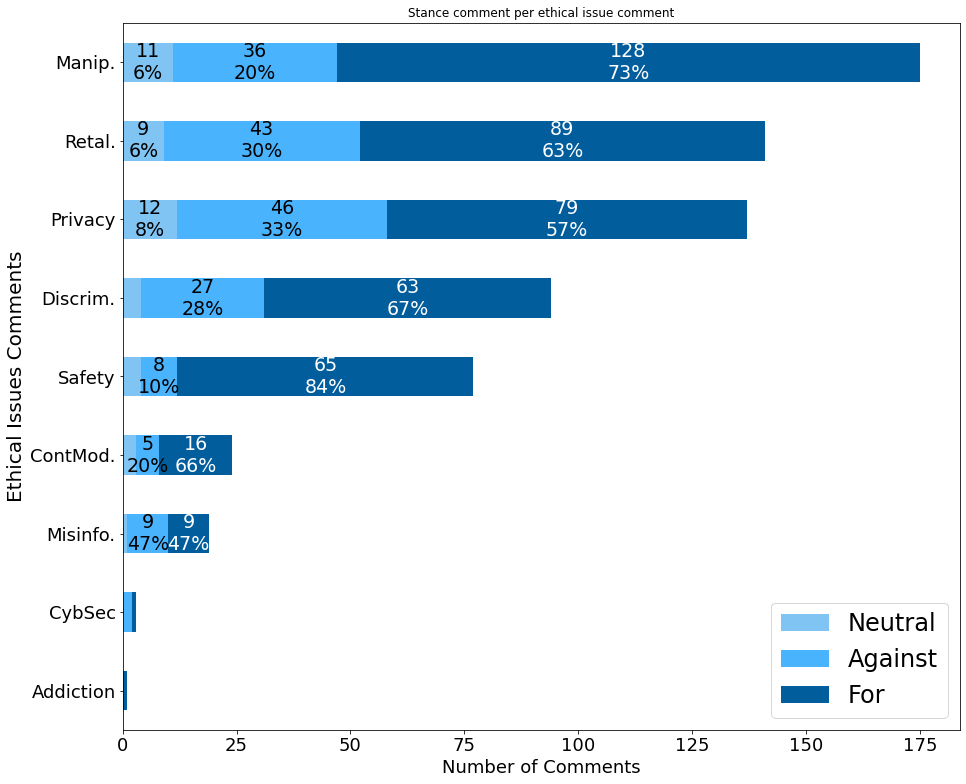

In [194]:
import pandas as pd
import matplotlib.pyplot as plt


data_dict = {
    'Retal.': {
        'Neutral': (len(df_retal_neutral), get_percent(df_retal_neutral, df_retal_comment)),
        'Against': (len(df_retal_neg), get_percent(df_retal_neg, df_retal_comment)),
        'For': (len(df_retal_pos), get_percent(df_retal_pos, df_retal_comment))
    },
    'Privacy': {
        'Neutral': (len(df_privacy_neutral), get_percent(df_privacy_neutral, df_priv_comment)),
        'Against': (len(df_privacy_neg), get_percent(df_privacy_neg, df_priv_comment)),
        'For': (len(df_privacy_pos), get_percent(df_privacy_pos, df_priv_comment))
    },
    'Manip.': {
        'Neutral': (len(df_manipulation_neutral), get_percent(df_manipulation_neutral, df_manip_comment)),
        'Against': (len(df_manipulation_neg), get_percent(df_manipulation_neg, df_manip_comment)),
        'For': (len(df_manipulation_pos), get_percent(df_manipulation_pos, df_manip_comment))
    },
    'Safety': {
        'Neutral': (len(df_safety_neutral), get_percent(df_safety_neutral, df_safety_comment)),
        'Against': (len(df_safety_neg), get_percent(df_safety_neg, df_safety_comment)),
        'For': (len(df_safety_pos), get_percent(df_safety_pos, df_safety_comment))
    },
    'ContMod.': {
        'Neutral': (len(df_content_neutral), get_percent(df_content_neutral, df_contmod_comment)),
        'Against': (len(df_content_neg), get_percent(df_content_neg, df_contmod_comment)),
        'For': (len(df_content_pos), get_percent(df_content_pos, df_contmod_comment))
    },
    'Discrim.': {
        'Neutral': (len(df_discrim_neutral), get_percent(df_discrim_neutral, df_disc_comment)),
        'Against': (len(df_discrim_neg), get_percent(df_discrim_neg, df_disc_comment)),
        'For': (len(df_discrim_pos), get_percent(df_discrim_pos, df_disc_comment))
    },
    'Misinfo.': {
        'Neutral': (len(df_misinfo_neutral), get_percent(df_misinfo_neutral, df_misinfo_comment)),
        'Against': (len(df_misinfo_neg), get_percent(df_misinfo_neg, df_misinfo_comment)),
        'For': (len(df_misinfo_pos), get_percent(df_misinfo_pos, df_misinfo_comment))
    },
    'CybSec': {
        'Neutral': (len(df_cybsec_neutral), get_percent(df_cybsec_neutral, df_cybsec_comment)),
        'Against': (len(df_cybsec_neg), get_percent(df_cybsec_neg, df_cybsec_comment)),
        'For': (len(df_cybsec_pos), get_percent(df_cybsec_pos, df_cybsec_comment))
    },
    'Addiction': {
        'Neutral': (len(df_addiction_neutral), get_percent(df_addiction_neutral, df_addict_comment)),
        'Against': (len(df_addiction_neg), get_percent(df_addiction_neg, df_addict_comment)),
        'For': (len(df_addiction_pos), get_percent(df_addiction_pos, df_addict_comment))
    }

}

# Convert data_dict to DataFrame for plotting
df_chart = pd.DataFrame({k: {sk: v[0] for sk, v in d.items()} for k, d in data_dict.items()}).T
df_chart['Total'] = df_chart[['Neutral', 'Against', 'For']].sum(axis=1)
df_chart_sorted = df_chart.sort_values(by='Total', ascending=True).drop(columns='Total')
df_chart_sorted_within = df_chart_sorted[['Neutral', 'Against', 'For']]

colors = {
    'Neutral': '#80c4f4',   # light blue
    'Against': '#49b3fe',   # blue
    'For': '#025d9d'        # dark blue
}

# Stacked horizontal bar plot
ax = df_chart_sorted_within.plot(kind='barh', stacked=True, figsize=(15, 13), color=[colors['Neutral'], colors['Against'], colors['For']])

# Adding count and percentage text
for i, (row_name, row) in enumerate(df_chart_sorted_within.iterrows()):
    cumulative_sum = 0
    for category in ['Neutral', 'Against', 'For']:
        value = row[category]
        cumulative_sum += value
        if value > 4:
            text_color = 'black' if category in ['Neutral', 'Against'] else 'white'
            count, percent = data_dict[row_name][category]
            ax.text(
                cumulative_sum - value / 2,
                i,
                f'{count}\n{percent}%',
                va='center',
                ha='center',
                fontsize=19,
                color=text_color,
            )

plt.xlabel('Number of Comments', fontsize=18)
plt.ylabel('Ethical Issues Comments', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=24)
plt.title('Stance comment per ethical issue comment')
plt.show()


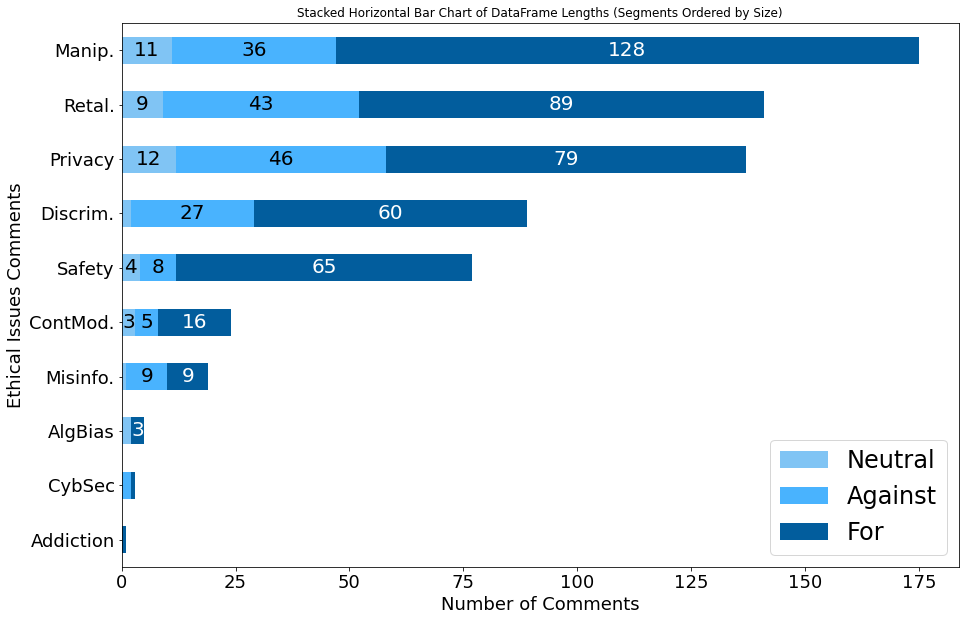

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

data_dict = {
    'Retal.': {'Neutral': len(df_retal_neutral), 'Against': len(df_retal_neg), 'For': len(df_retal_pos)},
    'Privacy': {'Neutral': len(df_privacy_neutral), 'Against': len(df_privacy_neg), 'For': len(df_privacy_pos)},
    'Manip.': {'Neutral': len(df_manipulation_neutral), 'Against': len(df_manipulation_neg), 'For': len(df_manipulation_pos)},
    'Safety': {'Neutral': len(df_safety_neutral), 'Against': len(df_safety_neg), 'For': len(df_safety_pos)},
    'ContMod.': {'Neutral': len(df_content_neutral), 'Against': len(df_content_neg), 'For': len(df_content_pos)},
    'Discrim.': {'Neutral': len(df_discrim_neutral), 'Against': len(df_discrim_neg), 'For': len(df_discrim_pos)},
    'Misinfo.': {'Neutral': len(df_misinfo_neutral), 'Against': len(df_misinfo_neg), 'For': len(df_misinfo_pos)},
    'CybSec': {'Neutral': len(df_cybsec_neutral), 'Against': len(df_cybsec_neg), 'For': len(df_cybsec_pos)},
    'Addiction': {'Neutral': len(df_addiction_neutral), 'Against': len(df_addiction_neg), 'For': len(df_addiction_pos)},
    'AlgBias': {'Neutral': len(df_algbias_neutral), 'Against': len(df_algbias_neg), 'For': len(df_algbias_pos)}
}

#dict to df
df_chart = pd.DataFrame(data_dict).T

#total width
df_chart['Total'] = df_chart[['Neutral', 'Against', 'For']].sum(axis=1)

#sort total width in descending order
df_chart_sorted = df_chart.sort_values(by='Total', ascending=True).drop(columns='Total')

#sort data by category
df_chart_sorted_within = df_chart_sorted[['Neutral', 'Against', 'For']]


colors = {
    'Neutral': '#80c4f4',   #light blue
    'Against': '#49b3fe',   #blue
    'For': '#025d9d'        #dark blue
}

#stacked horizontal bar plot
ax = df_chart_sorted_within.plot(kind='barh', stacked=True, figsize=(15, 10), color=[colors['Neutral'], colors['Against'], colors['For']])


for i, (row_name, row) in enumerate(df_chart_sorted_within.iterrows()):
    cumulative_sum = 0
    for category in ['Neutral', 'Against', 'For']:
        value = row[category]
        cumulative_sum += value
        if value > 2:
            text_color = 'black' if category in ['Neutral', 'Against'] else 'white'
            ax.text(
                cumulative_sum - value / 2,
                i,
                str(value),
                va='center',
                ha='center',
                fontsize=20,
                color=text_color
            )

plt.xlabel('Number of Comments', fontsize=18)
plt.ylabel('Ethical Issues Comments', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=24)
plt.title('Stance comment per ethical issue comment')
plt.show()


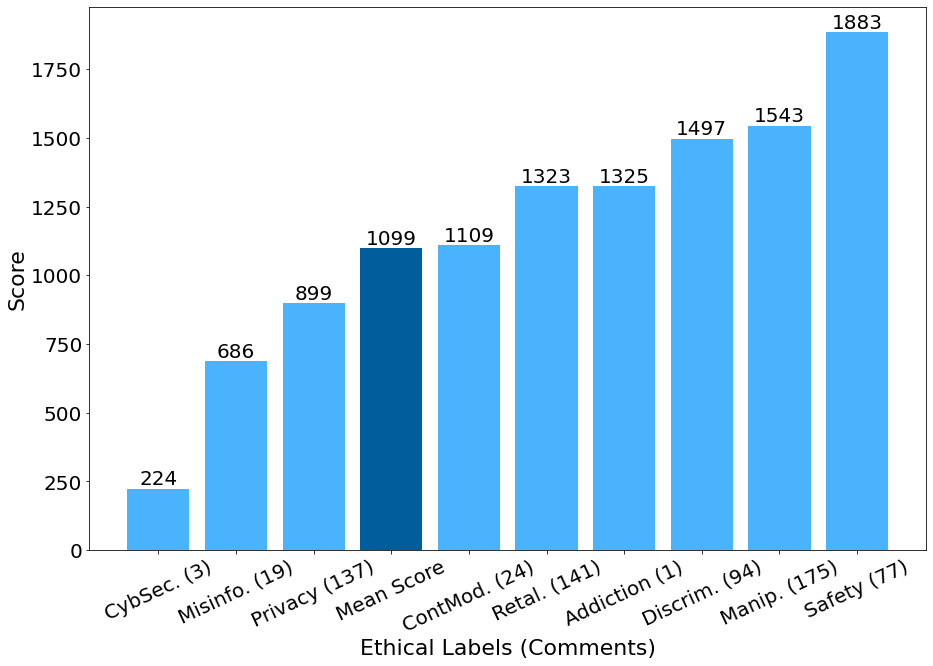

In [202]:
comment_labels = []
comment_label_scores = []

label_score_dict.update({"Mean Score":df["Score"].mean()})

label_score_dict = sorted(label_score_dict.items(), key=lambda x:x[1])

label_score_dict = dict(label_score_dict)

for k, v in label_score_dict.items():
    comment_labels.append(k)
    comment_label_scores.append(v)

x = comment_label_scores
labels = comment_labels

#bar plot
plt.figure(figsize=(15, 10))


highlight_index = 3 #highlight color

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.bar(labels, x, color=colors)

plt.xlabel('Ethical Labels (Comments)', fontsize = 22)
plt.ylabel('Score', fontsize = 22)
plt.yticks(fontsize = 20)
plt.xticks(rotation=25, fontsize = 20)

#value on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )

#plt.savefig("results/EthicalLabelsScoreMeansComments.jpg")

plt.show()




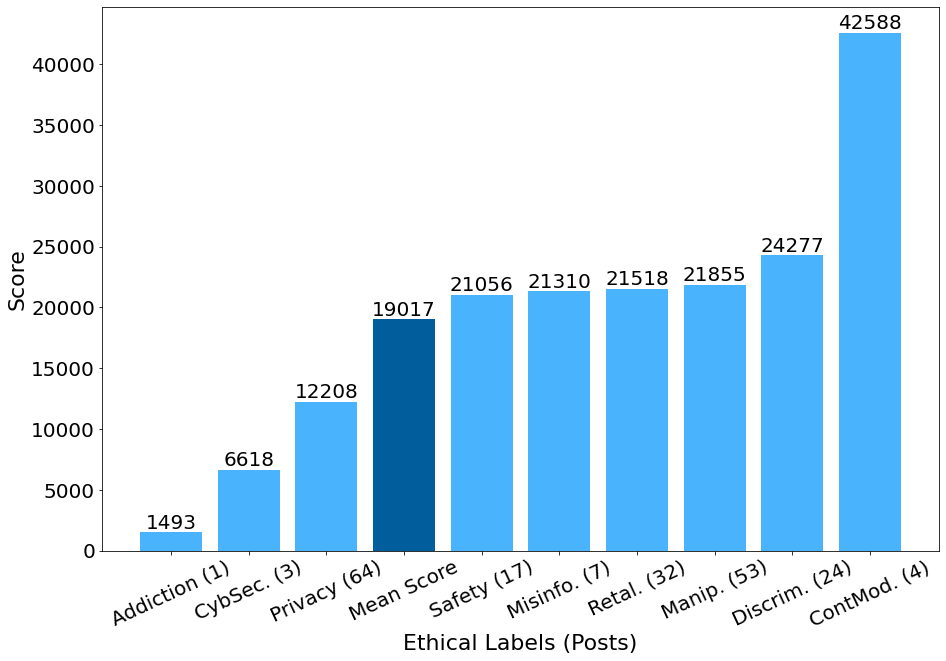

In [203]:
post_labels = []
post_label_scores = []

label_score_dict_post.update({"Mean Score":df_posts["Post_Score"].mean()})

label_score_dict_post = sorted(label_score_dict_post.items(), key=lambda x:x[1])

label_score_dict_post = dict(label_score_dict_post)

for k, v in label_score_dict_post.items():
    post_labels.append(k)
    post_label_scores.append(v)

x = post_label_scores
labels = post_labels



plt.figure(figsize=(15, 10))


highlight_index = 3 #highlight color index change if needed

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.bar(labels, x, color=colors)



plt.xlabel('Ethical Labels (Posts)',fontsize =  22)
plt.ylabel('Score',fontsize =  22)
plt.xticks(rotation=25, fontsize = 20)
plt.yticks(fontsize = 20)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )

#plt.savefig("results/EthicalLabelsScoreMeansPosts.jpg")

plt.show()




In [317]:
label_numcom_dict_post.update({"Mean Num Comments":df_posts["Num_Comments"].mean()})

label_numcom_dict_post = sorted(label_numcom_dict_post.items(), key=lambda x:x[1])

label_numcom_dict_post = dict(label_numcom_dict_post)

label_numcom_dict_post

{'Addiction (1)': 219.0,
 'CybSec. (3)': 331.0,
 'Privacy (64)': 650.671875,
 'Alg.Bias (1)': 652.0,
 'Misinfo. (7)': 896.5714285714286,
 'Manip. (53)': 1001.3207547169811,
 'Mean Num Comments': 1061.9545454545455,
 'Retal. (32)': 1237.21875,
 'Safety (17)': 1280.8235294117646,
 'Discrim. (24)': 1405.0416666666667,
 'ContMod. (4)': 2633.0}

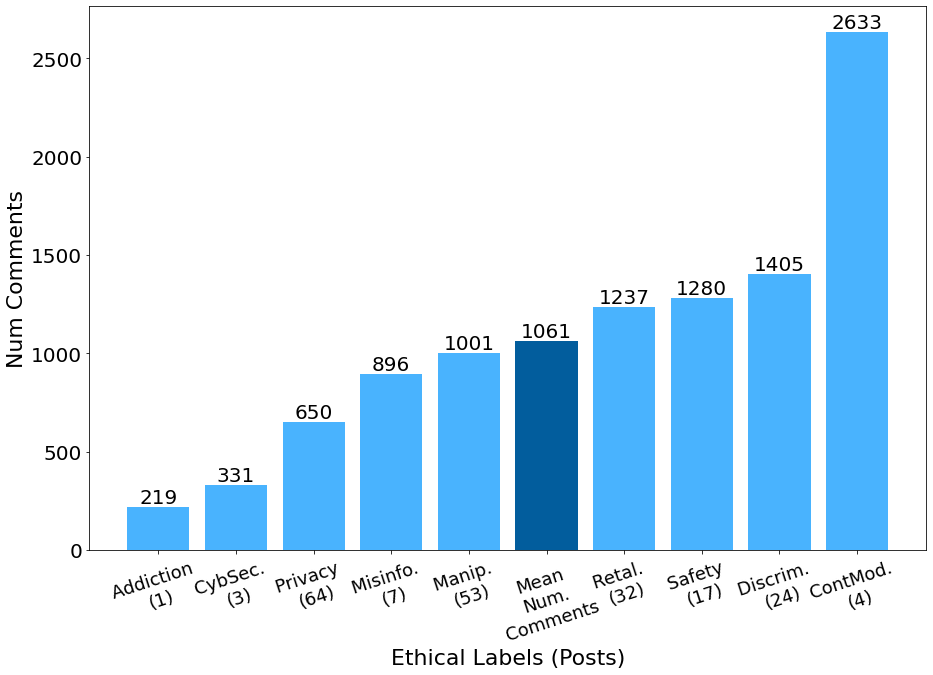

In [206]:
post_labels = []
post_label_numcoms = []

label_numcom_dict_post.update({"Mean" + "\n" "Num." + "\n" + "Comments":df_posts["Num_Comments"].mean()})

label_numcom_dict_post = sorted(label_numcom_dict_post.items(), key=lambda x:x[1])

label_numcom_dict_post = dict(label_numcom_dict_post)

for k, v in label_numcom_dict_post.items():
    post_labels.append(k)
    post_label_numcoms.append(v)

x = post_label_numcoms
labels = post_labels

plt.figure(figsize=(15, 10))

highlight_index = 5

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.bar(labels, x, color=colors)


plt.xlabel('Ethical Labels (Posts)', fontsize = 22)
plt.ylabel('Num Comments', fontsize = 22)
plt.yticks(fontsize = 20)

plt.xticks(rotation=18, fontsize = 18)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )

#plt.savefig("results/EthicalLabelsNumComMeansPosts.jpg")
plt.show()


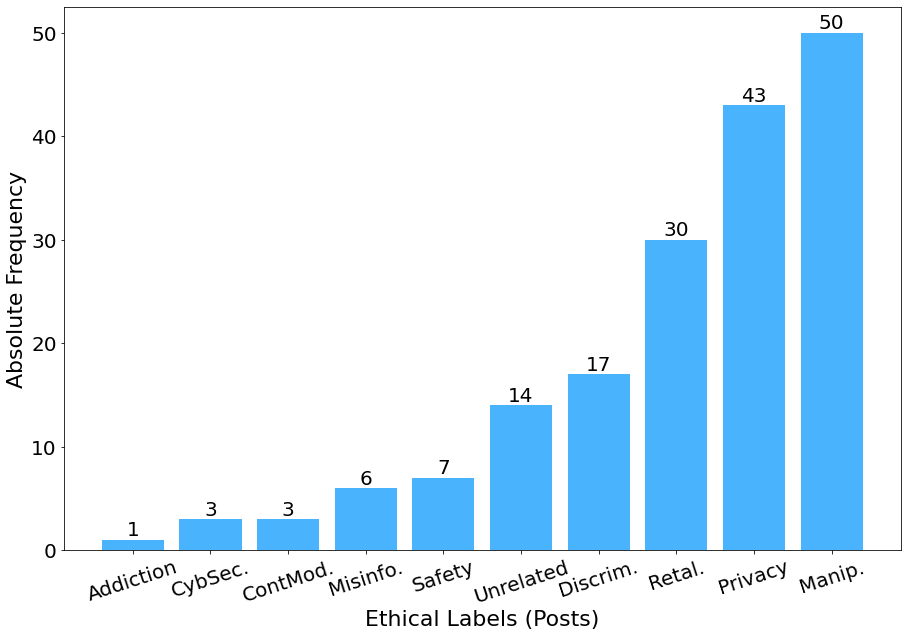

In [219]:
x_values = [1, 3, 3, 6, 7, 14, 17, 30, 43, 50]
x_labels = [ "Addiction", "CybSec.", "ContMod.", "Misinfo.", "Safety", "Unrelated", "Discrim.", 
            "Retal.", "Privacy", "Manip."]

plt.figure(figsize = (15, 10))

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']

bars = plt.bar(x_labels, x_values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )

plt.xlabel('Ethical Labels (Posts)', fontsize = 22)
plt.ylabel('Absolute Frequency', fontsize = 22)
plt.yticks(fontsize = 20)
plt.xticks(rotation=18, fontsize = 20)

plt.show()

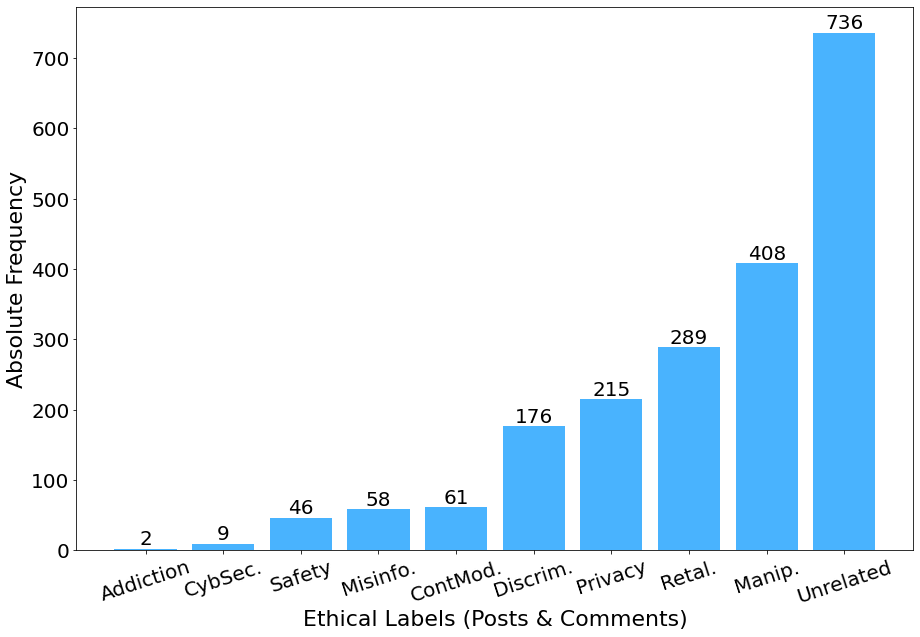

In [220]:
x_values = [2, 9, 46, 58, 61, 176, 215, 289, 408, 736]
x_labels = ["Addiction", "CybSec.", "Safety", "Misinfo.", "ContMod.", "Discrim.", 
            "Privacy", "Retal.",  "Manip.", "Unrelated"]

plt.figure(figsize = (15, 10))

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']

bars = plt.bar(x_labels, x_values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )

plt.xlabel('Ethical Labels (Posts & Comments)', fontsize = 22)
plt.ylabel('Absolute Frequency', fontsize = 22)
plt.yticks(fontsize = 20)
plt.xticks(rotation=18, fontsize = 20)

plt.show()

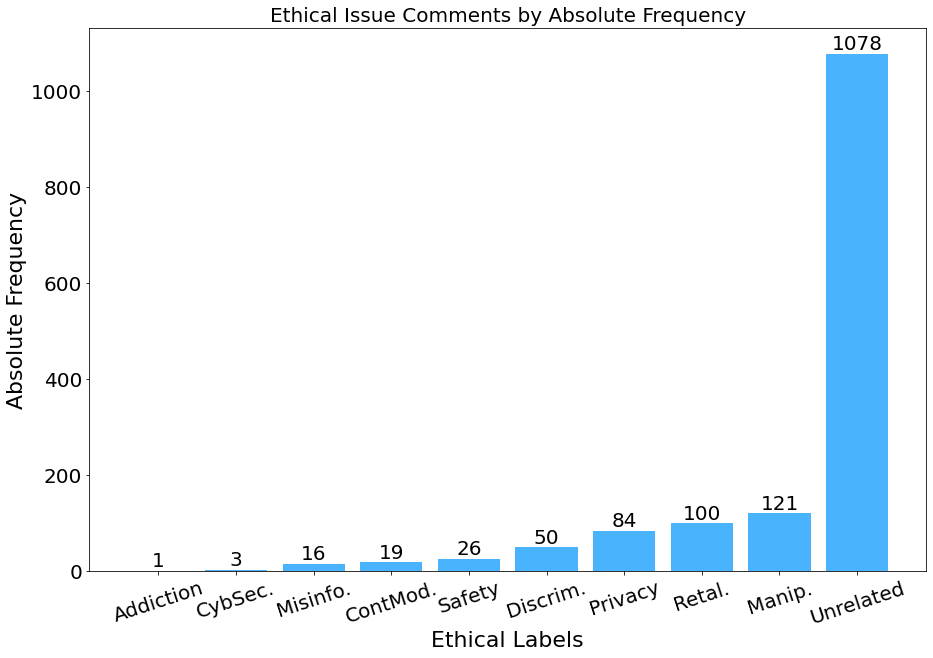

In [297]:
x_values = [1, 3, 16, 19, 26, 50, 84, 100, 121, 1078]
x_labels = ["Addiction", "CybSec.", "Misinfo.", "ContMod.", "Safety", "Discrim.", 
            "Privacy", "Retal.", "Manip.", "Unrelated"]

plt.figure(figsize = (15, 10))

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe']

bars = plt.bar(x_labels, x_values, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%d' % int(height),
        ha='center',
        va='bottom',
        fontsize = 20
    )
    
plt.title("Ethical Issue Comments by Absolute Frequency", fontsize = 20)
plt.xlabel('Ethical Labels', fontsize = 22)
plt.ylabel('Absolute Frequency', fontsize = 22)
plt.yticks(fontsize = 20)
plt.xticks(rotation=18, fontsize = 20)

plt.show()

## Research question 2 stuff

In [162]:
df_stats = pd.read_excel("data/finalannotation+poststats+date.xlsx")

In [163]:
df_stats.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Post_ID', 'Post_Title', 'Post_URL',
       'Comment_ID', 'Post_Score', 'Num_Comments', 'Body', 'Score',
       'post_date', 'Subreddit', 'type label post',
       'ethical issue label post 1', 'ethical issue label post 2',
       'stance post', 'type label comment', 'ethical issue label comment 1',
       'ethical issue label comment 2', 'stance comment'],
      dtype='object')

In [164]:
df_stats["Comment_ID"].nunique()

1000

In [165]:
df_stats = df_stats[["Post_ID", "Post_Score", "ethical issue label post 1", "ethical issue label post 2", 
                     "Comment_ID", "Score", "ethical issue label comment 1", "ethical issue label comment 2"]]

In [166]:
#combine ethical issues to issue pair post, tuple
df_stats["Issue Pair Post"] = df_stats.apply(lambda row: (row["ethical issue label post 1"], 
                                                          row["ethical issue label post 2"]), axis=1)

#create group ids within similar post ids to see unique issue pairs
df_stats["Group_ID"] = df_stats.groupby(["Post_ID", "Issue Pair Post"]).ngroup()

def count_unrelated(series):
    return (series == "11. unrelated").sum()

#count the amount of unrelated comment per specific issue pair post
df_stats["Unrelated Count"] = df_stats.groupby("Group_ID")["ethical issue label comment 1"].transform(count_unrelated)

#create issue pair for the comments
df_stats["Issue Pair Comment"] = df_stats.apply(lambda row: (row["ethical issue label comment 1"], row["ethical issue label comment 2"]), axis=1)

old_len_unrelated = len(df_stats)
old_len_related = len(df_stats[df_stats["ethical issue label comment 1"] != "11. unrelated"])

#df_stats = df_stats[df_stats["ethical issue label comment 1"] != "11. unrelated"]
#df_stats = df_stats[df_stats["ethical issue label comment 2"] != "11. unrelated"]

#extract numeric part from string and convert it to integer so we can sort the strings by their number
def extract_number(s):
    match = re.match(r"(\d+)\.", s)
    return int(match.group(1)) if match else 0

#sort tuples based on the numeric part
def sort_tuple(t):
    #extract numbers and sort tuples
    sorted_tuple = sorted(t, key=lambda x: extract_number(x))
    return tuple(sorted_tuple)

#df_stats['Issue Pair Comment'] = df_stats['Issue Pair Comment'].apply(tuple)

#sort the issue pair tuples
df_stats["Issue Pair Post"] = df_stats["Issue Pair Post"].apply(sort_tuple)
df_stats["Issue Pair Comment"] = df_stats["Issue Pair Comment"].apply(sort_tuple)


#new column to check matches between issue pairs post and comments
df_stats["Match"] = df_stats.apply(lambda row: list(row["Issue Pair Post"]) == list(row["Issue Pair Comment"]), axis=1)
df_stats["Non_Match"] = df_stats.apply(lambda row: list(row["Issue Pair Post"]) != list(row["Issue Pair Comment"]), axis=1)

#adding a suffix to the post id when posts with the same id are different
def add_suffix(group):
    unique_pairs = group["Issue Pair Post"].unique()
    pair_to_suffix = {pair: f"_{i}" if i > 0 else "" for i, pair in enumerate(unique_pairs)}
    group["Post_ID_Modified"] = group["Post_ID"] + group["Issue Pair Post"].map(pair_to_suffix)
    return group

df_stats = df_stats.groupby("Post_ID").apply(add_suffix)

#group by modified post id and count the matches within each group
match_counts = df_stats.groupby("Post_ID_Modified")["Match"].sum().reset_index()
match_counts.rename(columns={"Match": "Match Count"}, inplace=True)

non_match_counts = df_stats.groupby("Post_ID_Modified")["Non_Match"].sum().reset_index()
non_match_counts.rename(columns={"Non_Match": "Non_Match Count"}, inplace=True)

#merge the match counts back into the original dataframe
df_stats = df_stats.merge(match_counts, on="Post_ID_Modified")
df_stats = df_stats.merge(non_match_counts, on="Post_ID_Modified")

#df_stats = df_stats.drop(columns = "Group_ID")

df_stats["Post_ID"] = df_stats["Post_ID_Modified"]
df_stats["Comment_Score_Mean"] = df_stats.groupby("Post_ID")["Score"].transform("mean")
df_stats["Comment_Score_Mean"] = df_stats["Comment_Score_Mean"].round(2)
df_stats.drop(columns=["Group_ID", "Post_ID_Modified"], inplace=True)
#df_stats['Issue Pair Comment'] = df_stats['Issue Pair Comment'].apply(tuple)
df_stats["Num Comments"] = df_stats.groupby("Post_ID")["Comment_ID"].transform(lambda x: x.nunique())



In [167]:
df_stats_post = df_stats.drop_duplicates("Post_ID")
df_stats_post["Unrelated Count"].sum()

510

In [168]:
df_stats[0:25]

,Post_ID,Post_Score,ethical issue label post 1,ethical issue label post 2,Comment_ID,Score,ethical issue label comment 1,ethical issue label comment 2,Issue Pair Post,Unrelated Count,Issue Pair Comment,Match,Non_Match,Match Count,Non_Match Count,Comment_Score_Mean,Num Comments
0,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kuftd3m,1182,11. unrelated,11. unrelated,"(7. safety, 9. whistleblower retaliation)",2,"(11. unrelated, 11. unrelated)",False,True,6,13,2994.84,19
1,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufk6io,2552,9. whistleblower retaliation,13. only one issue,"(7. safety, 9. whistleblower retaliation)",2,"(9. whistleblower retaliation, 13. only one is...",False,True,6,13,2994.84,19
2,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufqaxo,3687,7. safety,13. only one issue,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 13. only one issue)",False,True,6,13,2994.84,19
3,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufx1i0,1835,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19
4,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufjeho,3247,9. whistleblower retaliation,13. only one issue,"(7. safety, 9. whistleblower retaliation)",2,"(9. whistleblower retaliation, 13. only one is...",False,True,6,13,2994.84,19
5,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufjqws,1315,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19
6,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufkgjh,12141,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19
7,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kuflu27,1279,7. safety,13. only one issue,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 13. only one issue)",False,True,6,13,2994.84,19
8,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufj54n,10076,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19
9,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufn2zf,7787,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19


In [169]:
df_stats_post["Match Count"].sum() + df_stats_post["Non_Match Count"].sum()

1000

In [170]:
len(df_stats[df_stats["Issue Pair Post"].apply(lambda x: "0. privacy" in x)])

235

In [171]:
df_stats_related = df_stats[df_stats["Issue Pair Comment"].apply(lambda x: "11. unrelated" not in x)]

In [172]:
df_stats_related = df_stats_related.loc[df_stats_related.groupby("Post_ID")["Score"].idxmax()]
df_stats_unrelated = df_stats.loc[df_stats.groupby("Post_ID")["Score"].idxmax()]

In [173]:
df_stats_related["Issue Pair Comment"].value_counts()

(0. privacy, 13. only one issue)                                24
(5. manipulation, 13. only one issue)                           17
(0. privacy, 5. manipulation)                                   16
(7. safety, 13. only one issue)                                 12
(0. privacy, 9. whistleblower retaliation)                      10
(3. discrimination, 13. only one issue)                          6
(3. discrimination, 5. manipulation)                             6
(9. whistleblower retaliation, 13. only one issue)               5
(5. manipulation, 9. whistleblower retaliation)                  4
(7. safety, 9. whistleblower retaliation)                        3
(4. misinformation, 5. manipulation)                             3
(3. discrimination, 9. whistleblower retaliation)                3
(1. content moderation, 13. only one issue)                      2
(0. privacy, 3. discrimination)                                  2
(1. content moderation, 4. misinformation)                    

In [174]:
overlapping_post_ids = df_stats_related["Post_ID"]

df_stats_unrelated = df_stats_unrelated[~df_stats_unrelated["Post_ID"].isin(overlapping_post_ids)]

In [175]:
df_stats_unrelated

,Post_ID,Post_Score,ethical issue label post 1,ethical issue label post 2,Comment_ID,Score,ethical issue label comment 1,ethical issue label comment 2,Issue Pair Post,Unrelated Count,Issue Pair Comment,Match,Non_Match,Match Count,Non_Match Count,Comment_Score_Mean,Num Comments
952,12dg41n,5651,3. discrimination,13. only one issue,jf7hsh2,-27,11. unrelated,11. unrelated,"(3. discrimination, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-27.00,1
994,13tee7v,3030,7. safety,13. only one issue,jlxkb1h,-35,11. unrelated,11. unrelated,"(7. safety, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-35.00,1
813,1gtn9g_1,3637,9. whistleblower retaliation,13. only one issue,canw1hd,986,11. unrelated,11. unrelated,"(9. whistleblower retaliation, 13. only one is...",1,"(11. unrelated, 11. unrelated)",False,True,0,1,986.00,1
814,1gtn9g_2,3637,0. privacy,13. only one issue,canps4v,-44,11. unrelated,11. unrelated,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-44.00,1
880,1guot5_1,3587,0. privacy,13. only one issue,cao0hhk,1200,11. unrelated,11. unrelated,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,1200.00,1
963,2f095v,17629,0. privacy,5. manipulation,ck4pos1,1507,11. unrelated,11. unrelated,"(0. privacy, 5. manipulation)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,1507.00,1
962,2ozeop,4179,0. privacy,13. only one issue,cms15vi,1063,11. unrelated,11. unrelated,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,1063.00,1
984,2r1a6q,3454,6. cybersecurity,7. safety,cnbv07c,-59,11. unrelated,11. unrelated,"(6. cybersecurity, 7. safety)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-59.00,1
997,4b69y5,226,0. privacy,13. only one issue,d16ek16,-38,11. unrelated,11. unrelated,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-38.00,1
699,4dn4kk_1,2593,0. privacy,13. only one issue,d1srzmx,-67,11. unrelated,11. unrelated,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-67.00,1


In [176]:
df_stats_related

,Post_ID,Post_Score,ethical issue label post 1,ethical issue label post 2,Comment_ID,Score,ethical issue label comment 1,ethical issue label comment 2,Issue Pair Post,Unrelated Count,Issue Pair Comment,Match,Non_Match,Match Count,Non_Match Count,Comment_Score_Mean,Num Comments
81,13rsxb5,52456,7. safety,13. only one issue,jlm7gl9,12335,7. safety,13. only one issue,"(7. safety, 13. only one issue)",23,"(7. safety, 13. only one issue)",True,False,11,30,1479.76,41
900,15eu0fe,5645,0. privacy,5. manipulation,juat811,1325,2. addiction,5. manipulation,"(0. privacy, 5. manipulation)",2,"(2. addiction, 5. manipulation)",False,True,0,5,832.80,5
416,18cdcfz,12094,7. safety,13. only one issue,kc9zbk3,1361,7. safety,13. only one issue,"(7. safety, 13. only one issue)",2,"(7. safety, 13. only one issue)",True,False,1,2,414.33,3
525,19ezv8a,11954,7. safety,13. only one issue,kjgihjo,2229,7. safety,13. only one issue,"(7. safety, 13. only one issue)",2,"(7. safety, 13. only one issue)",True,False,5,3,1019.38,8
6,1bcf9rh,57680,9. whistleblower retaliation,7. safety,kufkgjh,12141,9. whistleblower retaliation,7. safety,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,vx8ho1,38354,5. manipulation,13. only one issue,ifudxub,10782,5. manipulation,13. only one issue,"(5. manipulation, 13. only one issue)",2,"(5. manipulation, 13. only one issue)",True,False,9,2,2265.55,11
495,w4ccou,26496,5. manipulation,0. privacy,ih16je8,1473,5. manipulation,0. privacy,"(0. privacy, 5. manipulation)",1,"(0. privacy, 5. manipulation)",True,False,2,1,741.33,3
966,wcxf1a,4763,3. discrimination,8. algorithmic bias,iig2yn7,1091,9. whistleblower retaliation,3. discrimination,"(3. discrimination, 8. algorithmic bias)",1,"(3. discrimination, 9. whistleblower retaliation)",False,True,0,2,2090.00,2
748,wvvye7,42541,3. discrimination,5. manipulation,ili92ra,1583,0. privacy,5. manipulation,"(3. discrimination, 5. manipulation)",5,"(0. privacy, 5. manipulation)",False,True,2,8,992.20,10


In [177]:
df_stats["Total Percentage of Match Unrelated"] = round(df_stats_post["Match Count"].sum() / old_len_unrelated, 2)
df_stats["Total Percentage of Match Related"] = round(df_stats_post["Match Count"].sum() / old_len_related, 2)


In [178]:
df_stats = df_stats.drop(columns = ["ethical issue label post 1", "ethical issue label post 2",
                                    "ethical issue label comment 1", "ethical issue label comment 2"])

In [179]:
df_stats = df_stats.rename(columns={"Score": "Comment_Score"})

In [180]:
df_stats

,Post_ID,Post_Score,Comment_ID,Comment_Score,Issue Pair Post,Unrelated Count,Issue Pair Comment,Match,Non_Match,Match Count,Non_Match Count,Comment_Score_Mean,Num Comments,Total Percentage of Match Unrelated,Total Percentage of Match Related
0,1bcf9rh,57680,kuftd3m,1182,"(7. safety, 9. whistleblower retaliation)",2,"(11. unrelated, 11. unrelated)",False,True,6,13,2994.84,19,0.34,0.73
1,1bcf9rh,57680,kufk6io,2552,"(7. safety, 9. whistleblower retaliation)",2,"(9. whistleblower retaliation, 13. only one is...",False,True,6,13,2994.84,19,0.34,0.73
2,1bcf9rh,57680,kufqaxo,3687,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 13. only one issue)",False,True,6,13,2994.84,19,0.34,0.73
3,1bcf9rh,57680,kufx1i0,1835,"(7. safety, 9. whistleblower retaliation)",2,"(7. safety, 9. whistleblower retaliation)",True,False,6,13,2994.84,19,0.34,0.73
4,1bcf9rh,57680,kufjeho,3247,"(7. safety, 9. whistleblower retaliation)",2,"(9. whistleblower retaliation, 13. only one is...",False,True,6,13,2994.84,19,0.34,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4hnhir,2094,d2rc8dj,-27,"(0. privacy, 13. only one issue)",0,"(0. privacy, 13. only one issue)",True,False,1,0,-27.00,1,0.34,0.73
996,dmby6b,110,f4z97m8,-36,"(0. privacy, 5. manipulation)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-36.00,1,0.34,0.73
997,4b69y5,226,d16ek16,-38,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-38.00,1,0.34,0.73
998,kr2epq,3063,gi8435v,-34,"(0. privacy, 13. only one issue)",1,"(11. unrelated, 11. unrelated)",False,True,0,1,-34.00,1,0.34,0.73


In [181]:
df_stats.to_excel("data/dataRQ2full.xlsx")
df_stats_related.to_excel("data/dataRQ2relatedscore.xlsx")
df_stats_unrelated.to_excel("data/dataRQ2unrelatedscore.xlsx")

In [182]:
df["ethical issue label post 2"].unique()

array(['7. safety', '3. discrimination', '13. only one issue',
       '5. manipulation', '4. misinformation', '11. unrelated',
       '9. whistleblower retaliation', '0. privacy', '6. cybersecurity',
       '2. addiction', '8. algorithmic bias', '1. content moderation'],
      dtype=object)

In [183]:
df_rq2full = pd.read_excel("data/dataRQ2full.xlsx")

In [184]:
df_rq2full.columns

Index(['Unnamed: 0', 'Post_ID', 'Post_Score', 'Comment_ID', 'Comment_Score',
       'Issue Pair Post', 'Unrelated Count', 'Issue Pair Comment', 'Match',
       'Non_Match', 'Match Count', 'Non_Match Count', 'Comment_Score_Mean',
       'Num Comments', 'Total Percentage of Match Unrelated',
       'Total Percentage of Match Related'],
      dtype='object')

In [185]:
df_rq2full = df_rq2full.drop_duplicates("Post_ID")

In [186]:
df_rq2full["Unrelated Count"].mean()

3.0

In [187]:
def rq2_issues(frame, issue):
    frame = frame[frame["Issue Pair Post"].apply(lambda x: issue in x)]
    
    return frame

In [188]:
df_privstats = rq2_issues(df_rq2full, "0. privacy")
df_contentstats = rq2_issues(df_rq2full, "1. content moderation")
df_addictstats = rq2_issues(df_rq2full, "2. addiction")
df_discstats = rq2_issues(df_rq2full, "3. discrimination")
df_misinfstats = rq2_issues(df_rq2full, "4. misinformation")
df_manipstats = rq2_issues(df_rq2full, "5. manipulation")
df_cybsecstats = rq2_issues(df_rq2full, "6. cybersecurity")
df_safetystats = rq2_issues(df_rq2full, "7. safety")
df_algbiasstats = rq2_issues(df_rq2full, "8. algorithmic bias")
df_retalstats = rq2_issues(df_rq2full, "9. whistleblower retaliation")

In [189]:
df_list = [
    df_privstats,
    df_contentstats,
    df_addictstats,
    df_discstats,
    df_misinfstats,
    df_manipstats,
    df_cybsecstats,
    df_safetystats,
    df_algbiasstats,
    df_retalstats]

stats_label = [
    "privacy",
    "content moderation",
    "addiction",
    "discrimination",
    "misinformation",
    "manipulation",
    "cybersecurity",
    "safety",
    "algorithmic bias",
    "whistleblower retaliation"
]

stats_list = []

for i in df_list:
    unrel_count = i["Unrelated Count"].sum()
    stats_list.append(unrel_count)
    

    

In [218]:
def non_match_check(df):

    df = df.sort_values(by = "Issue Pair Comment")
    df = df[["Issue Pair Post", "Issue Pair Comment", "Match"]]
    df = df[df["Issue Pair Comment"] != "('11. unrelated', '11. unrelated')"]
    df = df[df["Match"] == False]

    return df

In [219]:
non_match_check(df_privstats)

,Issue Pair Post,Issue Pair Comment,Match
344,"('0. privacy', '9. whistleblower retaliation')","('0. privacy', '13. only one issue')",False
948,"('0. privacy', '5. manipulation')","('0. privacy', '13. only one issue')",False
934,"('0. privacy', '5. manipulation')","('0. privacy', '13. only one issue')",False
282,"('0. privacy', '13. only one issue')","('0. privacy', '3. discrimination')",False
667,"('0. privacy', '9. whistleblower retaliation')","('0. privacy', '5. manipulation')",False
827,"('0. privacy', '13. only one issue')","('0. privacy', '5. manipulation')",False
502,"('0. privacy', '13. only one issue')","('1. content moderation', '13. only one issue')",False
856,"('0. privacy', '5. manipulation')","('5. manipulation', '13. only one issue')",False


In [220]:
non_match_check(df_manipstats)

,Issue Pair Post,Issue Pair Comment,Match
948,"('0. privacy', '5. manipulation')","('0. privacy', '13. only one issue')",False
934,"('0. privacy', '5. manipulation')","('0. privacy', '13. only one issue')",False
105,"('4. misinformation', '5. manipulation')","('0. privacy', '5. manipulation')",False
329,"('5. manipulation', '9. whistleblower retaliat...","('4. misinformation', '13. only one issue')",False
372,"('1. content moderation', '5. manipulation')","('5. manipulation', '13. only one issue')",False
856,"('0. privacy', '5. manipulation')","('5. manipulation', '13. only one issue')",False
982,"('5. manipulation', '7. safety')","('5. manipulation', '13. only one issue')",False
983,"('5. manipulation', '9. whistleblower retaliat...","('9. whistleblower retaliation', '13. only one...",False


In [221]:
non_match_check(df_retalstats)

,Issue Pair Post,Issue Pair Comment,Match
19,"('9. whistleblower retaliation', '13. only one...","('0. privacy', '13. only one issue')",False
344,"('0. privacy', '9. whistleblower retaliation')","('0. privacy', '13. only one issue')",False
667,"('0. privacy', '9. whistleblower retaliation')","('0. privacy', '5. manipulation')",False
329,"('5. manipulation', '9. whistleblower retaliat...","('4. misinformation', '13. only one issue')",False
42,"('9. whistleblower retaliation', '13. only one...","('5. manipulation', '13. only one issue')",False
979,"('9. whistleblower retaliation', '13. only one...","('7. safety', '13. only one issue')",False
419,"('7. safety', '9. whistleblower retaliation')","('7. safety', '13. only one issue')",False
851,"('3. discrimination', '9. whistleblower retali...","('9. whistleblower retaliation', '13. only one...",False
43,"('3. discrimination', '9. whistleblower retali...","('9. whistleblower retaliation', '13. only one...",False
31,"('7. safety', '9. whistleblower retaliation')","('9. whistleblower retaliation', '13. only one...",False


In [222]:
non_match_check(df_discstats)

,Issue Pair Post,Issue Pair Comment,Match
966,"('3. discrimination', '8. algorithmic bias')","('3. discrimination', '9. whistleblower retali...",False
871,"('1. content moderation', '3. discrimination')","('7. safety', '13. only one issue')",False
851,"('3. discrimination', '9. whistleblower retali...","('9. whistleblower retaliation', '13. only one...",False
43,"('3. discrimination', '9. whistleblower retali...","('9. whistleblower retaliation', '13. only one...",False


In [223]:
non_match_check(df_safetystats)

,Issue Pair Post,Issue Pair Comment,Match
982,"('5. manipulation', '7. safety')","('5. manipulation', '13. only one issue')",False
419,"('7. safety', '9. whistleblower retaliation')","('7. safety', '13. only one issue')",False
905,"('7. safety', '13. only one issue')","('7. safety', '9. whistleblower retaliation')",False
31,"('7. safety', '9. whistleblower retaliation')","('9. whistleblower retaliation', '13. only one...",False


In [224]:
non_match_check(df_contentstats)

,Issue Pair Post,Issue Pair Comment,Match
372,"('1. content moderation', '5. manipulation')","('5. manipulation', '13. only one issue')",False
871,"('1. content moderation', '3. discrimination')","('7. safety', '13. only one issue')",False


In [225]:
non_match_check(df_algbiasstats)

,Issue Pair Post,Issue Pair Comment,Match
966,"('3. discrimination', '8. algorithmic bias')","('3. discrimination', '9. whistleblower retali...",False


In [227]:
non_match_check(df_misinfstats)

,Issue Pair Post,Issue Pair Comment,Match
105,"('4. misinformation', '5. manipulation')","('0. privacy', '5. manipulation')",False


In [201]:
df_unrel_dict = {"Retal.":df_retalstats["Unrelated Count"].mean(), 
                         "Manip.":df_manipstats["Unrelated Count"].mean(), 
                         "Privacy":df_privstats["Unrelated Count"].mean(), 
                         "Discrim.":df_discstats["Unrelated Count"].mean(),
                         "Safety":df_safetystats["Unrelated Count"].mean(), 
                         "ContMod.":df_contentstats["Unrelated Count"].mean(),
                         "Misinfo.":df_misinfstats["Unrelated Count"].mean(), 
                         "Alg.Bias":df_algbiasstats["Unrelated Count"].mean(),
                         "CybSec.":df_cybsecstats["Unrelated Count"].mean(), 
                         "Addiction":df_addictstats["Unrelated Count"].mean(), 
                         "Mean Num":df_rq2full["Unrelated Count"].mean()}

df_unrel_dict = dict(sorted(df_unrel_dict.items(), key=lambda item: item[1], reverse=True))

df_unrel_dict

{'ContMod.': 7.666666666666667,
 'Discrim.': 6.517241379310345,
 'Misinfo.': 3.75,
 'Mean Num': 3.0,
 'Safety': 2.85,
 'Retal.': 2.725,
 'Manip.': 2.7049180327868854,
 'CybSec.': 1.3333333333333333,
 'Alg.Bias': 1.0,
 'Addiction': 1.0,
 'Privacy': 0.926829268292683}

In [202]:
df_match_dict = {"Retal.":df_retalstats["Match Count"].mean(), 
                         "Manip.":df_manipstats["Match Count"].mean(), 
                         "Privacy":df_privstats["Match Count"].mean(), 
                         "Discrim.":df_discstats["Match Count"].mean(),
                         "Safety":df_safetystats["Match Count"].mean(), 
                         "ContMod.":df_contentstats["Match Count"].mean(),
                         "Misinfo.":df_misinfstats["Match Count"].mean(), 
                         "Alg.Bias":df_algbiasstats["Match Count"].mean(),
                         "CybSec.":df_cybsecstats["Match Count"].mean(), 
                         "Addiction":df_addictstats["Match Count"].mean(),
                         "Mean Num":df_rq2full["Match Count"].mean()}

df_match_dict = dict(sorted(df_match_dict.items(), key=lambda item: item[1], reverse=True))

df_match_dict

{'Safety': 2.55,
 'Discrim.': 2.3793103448275863,
 'Retal.': 2.3,
 'ContMod.': 2.0,
 'Mean Num': 1.9764705882352942,
 'Manip.': 1.8688524590163935,
 'Misinfo.': 1.5,
 'Privacy': 1.170731707317073,
 'CybSec.': 0.3333333333333333,
 'Alg.Bias': 0.0,
 'Addiction': 0.0}

In [203]:
df_nonmatch_dict = {"Retal.":df_retalstats["Non_Match Count"].mean(), 
                         "Manip.":df_manipstats["Non_Match Count"].mean(), 
                         "Privacy":df_privstats["Non_Match Count"].mean(), 
                         "Discrim.":df_discstats["Non_Match Count"].mean(),
                         "Safety":df_safetystats["Non_Match Count"].mean(), 
                         "ContMod.":df_contentstats["Non_Match Count"].mean(),
                         "Misinfo.":df_misinfstats["Non_Match Count"].mean(), 
                         "Alg.Bias":df_algbiasstats["Non_Match Count"].mean(),
                         "CybSec.":df_cybsecstats["Non_Match Count"].mean(), 
                         "Addiction":df_addictstats["Non_Match Count"].mean(),
                         "Mean Num":df_rq2full["Non_Match Count"].mean()}

df_nonmatch_dict = dict(sorted(df_nonmatch_dict.items(), key=lambda item: item[1], reverse=True))

df_nonmatch_dict

{'ContMod.': 10.5,
 'Discrim.': 8.482758620689655,
 'Retal.': 4.875,
 'Misinfo.': 4.625,
 'Safety': 4.6,
 'Manip.': 4.360655737704918,
 'Mean Num': 3.9058823529411764,
 'Alg.Bias': 2.0,
 'CybSec.': 2.0,
 'Privacy': 1.6951219512195121,
 'Addiction': 1.0}

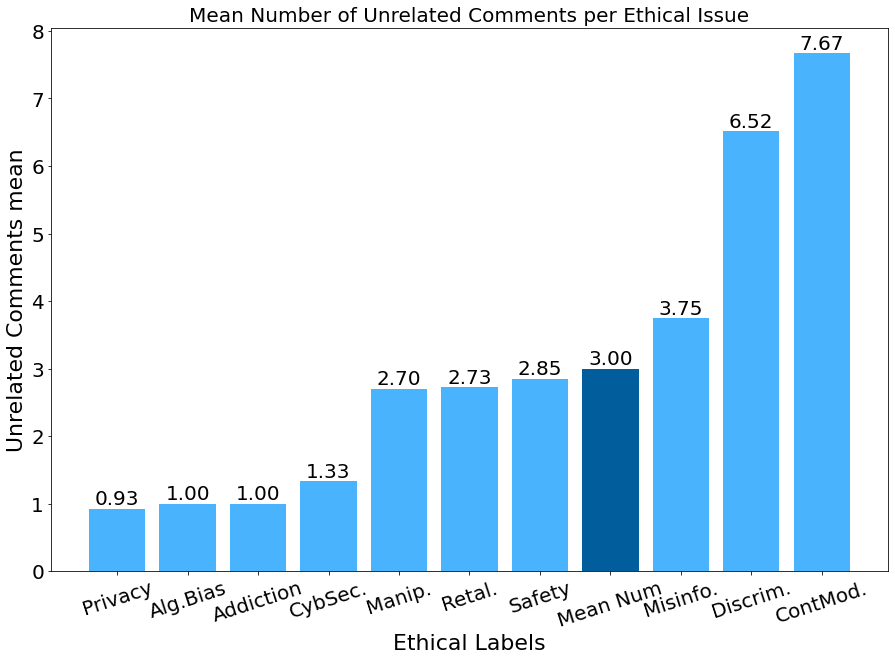

In [204]:
stats_labels = []
stats_scores = []

#df_unrel_dict.update({"Mean Number":df_rq2full["Unrelated Count"].mean()})

df_unrel_dict = sorted(df_unrel_dict.items(), key=lambda x:x[1])

df_unrel_dict = dict(df_unrel_dict)

for k, v in df_unrel_dict.items():
    stats_labels.append(k)
    stats_scores.append(v)

x = stats_scores
labels = stats_labels
#bar plot
plt.figure(figsize=(15, 10))


highlight_index = 7 


colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe'
         , '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.bar(labels, x, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        "%.2f" % height, 
        ha="center",
        va="bottom",
        fontsize=20
    )

plt.title("Mean Number of Unrelated Comments per Ethical Issue", fontsize = 20)
plt.xlabel("Ethical Labels", fontsize = 22)
plt.ylabel("Unrelated Comments mean", fontsize = 22)
plt.yticks(fontsize = 20)

plt.xticks(rotation=18, fontsize = 20)



#plt.savefig("results/EthicalLabelsNumComMeansPosts.jpg")

plt.show()

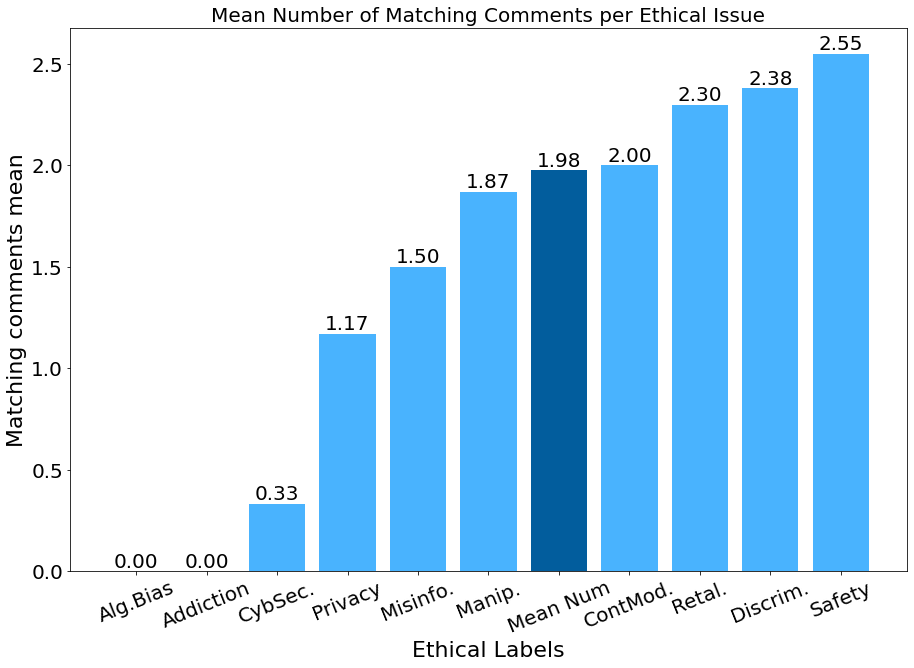

In [205]:
stats_labels = []
stats_scores = []

df_match_dict.update({"Mean Num":df_rq2full["Match Count"].mean()})

df_match_dict = sorted(df_match_dict.items(), key=lambda x:x[1])

df_match_dict = dict(df_match_dict)

for k, v in df_match_dict.items():
    stats_labels.append(k)
    stats_scores.append(v)

x = stats_scores
labels = stats_labels
#bar plot
plt.figure(figsize=(15, 10))


highlight_index = 6 

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe'
         , '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.bar(labels, x, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        '%.2f' % height,  # Format the height with 2 decimal places
        ha='center',
        va='bottom',
        fontsize=20
    )

plt.title("Mean Number of Matching Comments per Ethical Issue", fontsize = 20)
plt.xlabel("Ethical Labels", fontsize = 22)
plt.ylabel("Matching Comments mean", fontsize = 22)
plt.yticks(fontsize = 20)

plt.xticks(rotation=22, fontsize = 20)

#plt.savefig("results/EthicalLabelsNumComMeansPosts.jpg")

plt.show()

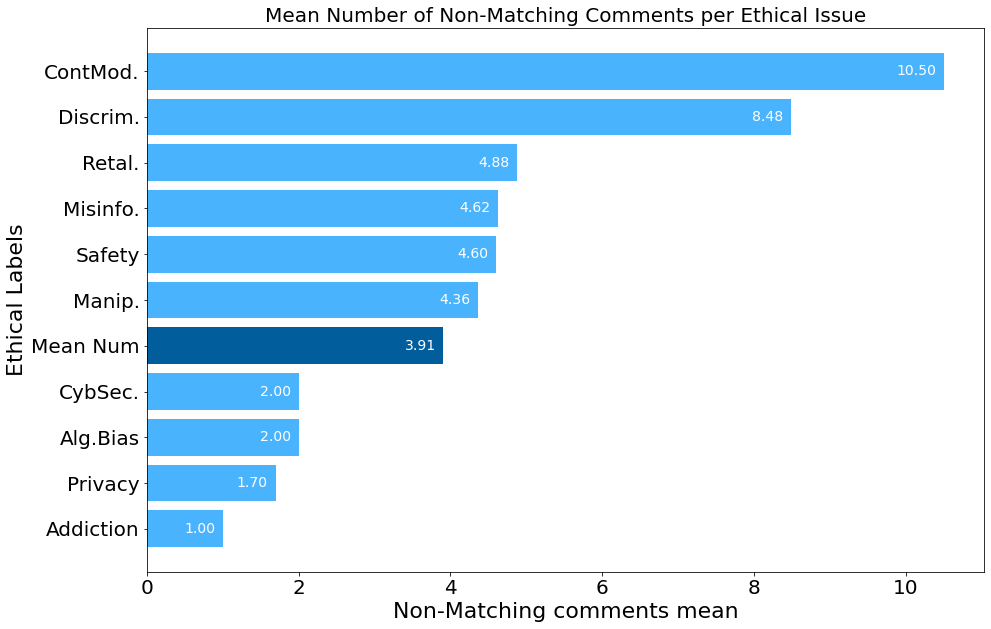

In [206]:
stats_labels = []
stats_scores = []

df_nonmatch_dict.update({"Mean Num":df_rq2full["Non_Match Count"].mean()})

df_nonmatch_dict = sorted(df_nonmatch_dict.items(), key=lambda x:x[1])

df_nonmatch_dict = dict(df_nonmatch_dict)

for k, v in df_nonmatch_dict.items():
    stats_labels.append(k)
    stats_scores.append(v)

x = stats_scores
labels = stats_labels
#bar plot
plt.figure(figsize=(15, 10))


highlight_index = 4

colors = ['#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe','#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe', '#49b3fe'
         , '#49b3fe', '#49b3fe', '#49b3fe']
colors[highlight_index] = '#025d9d'


bars = plt.barh(labels, x, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width- 0.1,
        bar.get_y() + bar.get_height() / 2,
        '{:.2f}'.format(width),
        ha='right',  
        va='center',  
        fontsize=14,
        color='white'
    )
    
    
plt.title("Mean Number of Non-Matching Comments per Ethical Issue", fontsize = 20)
plt.xlabel("Non-Matching comments mean", fontsize = 22)
plt.ylabel("Ethical Labels", fontsize = 22)
plt.yticks(fontsize = 20)

plt.xticks(fontsize = 20)



#plt.savefig("results/EthicalLabelsNumComMeansPosts.jpg")

plt.show()

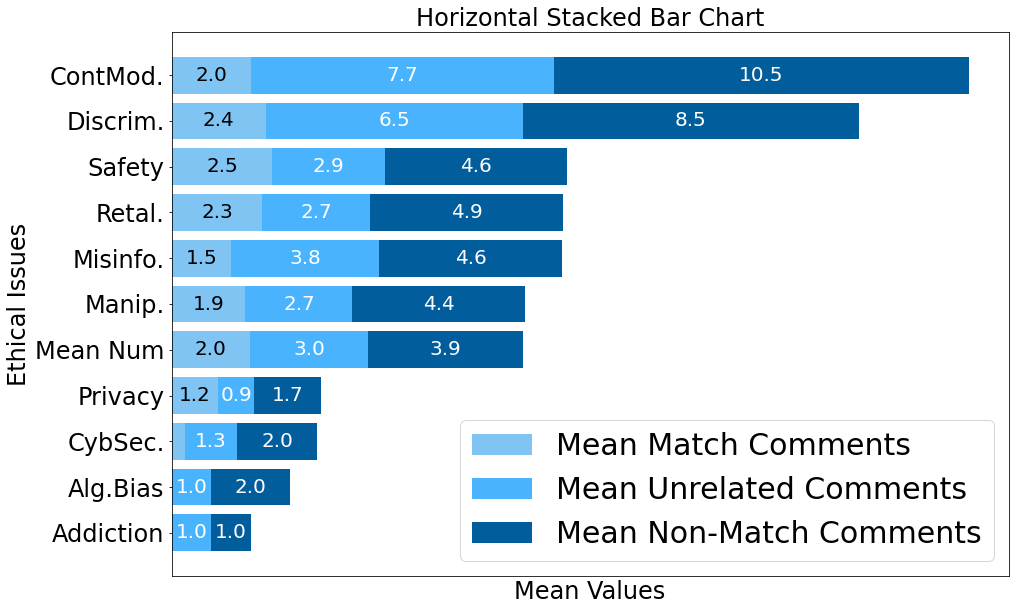

In [207]:
categories = sorted(set(df_match_dict.keys()).union(df_unrel_dict.keys()).union(df_nonmatch_dict.keys()))

#start data lists with zeros
data1 = [df_match_dict.get(cat, 0) for cat in categories]
data2 = [df_unrel_dict.get(cat, 0) for cat in categories]
data3 = [df_nonmatch_dict.get(cat, 0) for cat in categories]

#calculate total values for sorting
total_values = [data1[i] + data2[i] + data3[i] for i in range(len(categories))]

#combine categories and total values
categories_with_totals = list(zip(categories, total_values))

#sort based on total values
sorted_categories_with_totals = sorted(categories_with_totals, key=lambda x: x[1])

#unzip sorted categories and values
sorted_categories, sorted_totals = zip(*sorted_categories_with_totals)

#recalculate sorted data lists
sorted_data1 = [df_match_dict.get(cat, 0) for cat in sorted_categories]
sorted_data2 = [df_unrel_dict.get(cat, 0) for cat in sorted_categories]
sorted_data3 = [df_nonmatch_dict.get(cat, 0) for cat in sorted_categories]

#horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(15, 10))

#define the bars
bars1 = ax.barh(sorted_categories, sorted_data1, label='Mean Match Comments', color='#80c4f4')
bars2 = ax.barh(sorted_categories, sorted_data2, left=sorted_data1, label='Mean Unrelated Comments', color='#49b3fe')
bars3 = ax.barh(sorted_categories, sorted_data3, left=[i + j for i, j in zip(sorted_data1, sorted_data2)], 
                label='Mean Non-Match Comments', color='#025d9d')

#text labels on the bars
for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
    width1 = bar1.get_width()
    width2 = bar2.get_width()
    width3 = bar3.get_width()
    
    #add text if the width is above the threshold
    if width1 > 0.5:
        ax.text(
            width1 / 2,  #middle of the first segment
            bar1.get_y() + bar1.get_height() / 2,
            '{:.1f}'.format(width1),
            ha='center',
            va='center',
            fontsize=20,
            color='black'
        )
    
    if width2 > 0.5:
        ax.text(
            width1 + width2 / 2,  #middle of the second segment
            bar2.get_y() + bar2.get_height() / 2,
            '{:.1f}'.format(width2),
            ha='center',
            va='center',
            fontsize=20,
            color='white'
        )
    
    if width3 > 0.5:
        ax.text(
            width1 + width2 + width3 / 2,  #middle of the third segment
            bar3.get_y() + bar3.get_height() / 2,
            '{:.1f}'.format(width3),
            ha='center',
            va='center',
            fontsize=20,
            color='white'
        )


ax.set_xlabel('Mean Values', fontsize=24)
ax.set_ylabel('Ethical Issues', fontsize=24)
ax.set_title('Horizontal Stacked Bar Chart', fontsize=24)
ax.set_xticks([])
plt.yticks(fontsize=24)
ax.legend(fontsize=30)

plt.show()

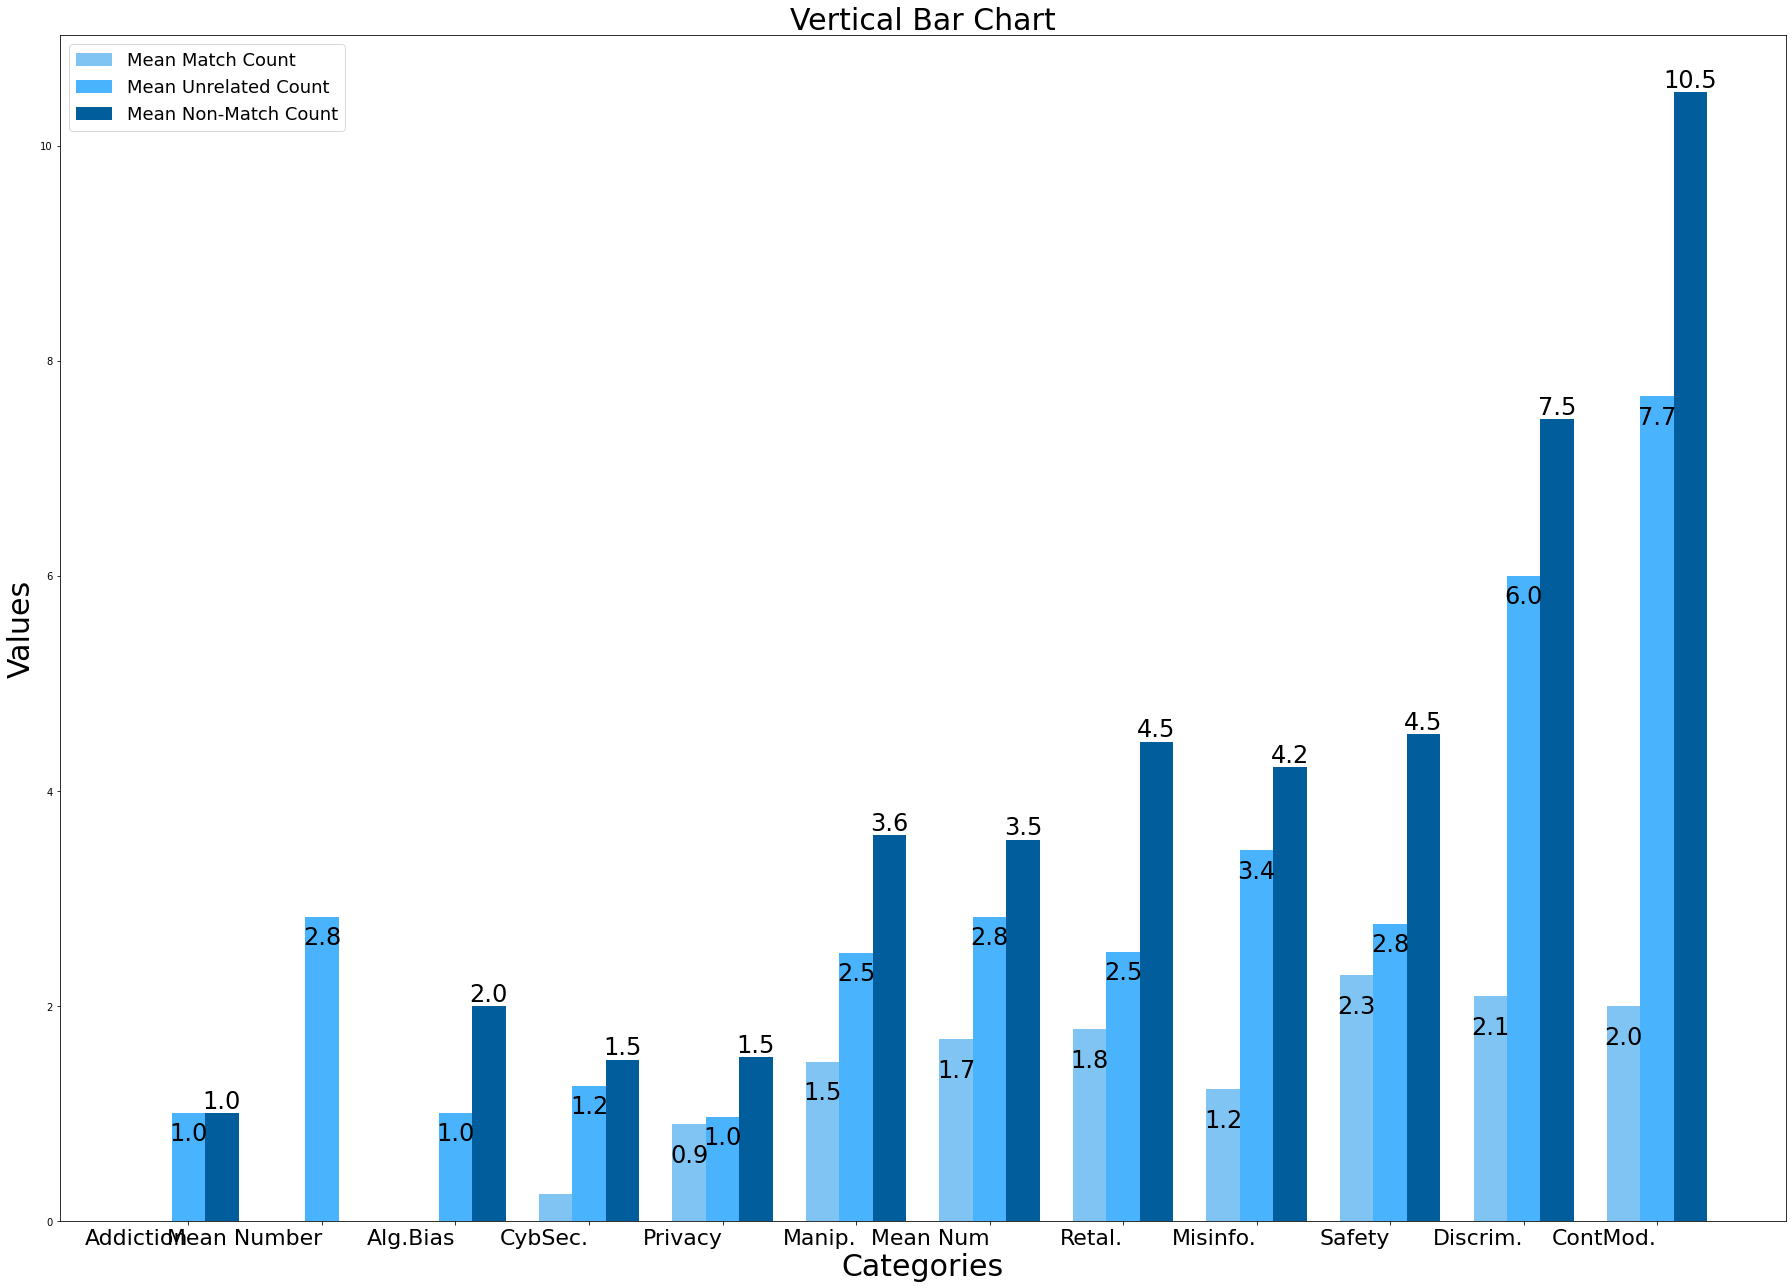

In [40]:
categories = sorted(set(df_match_dict.keys()).union(df_unrel_dict.keys()).union(df_nonmatch_dict.keys()))

#start data lists with zeros
data1 = [df_match_dict.get(cat, 0) for cat in categories]
data2 = [df_unrel_dict.get(cat, 0) for cat in categories]
data3 = [df_nonmatch_dict.get(cat, 0) for cat in categories]

#calculate total values for sorting
total_values = [data1[i] + data2[i] + data3[i] for i in range(len(categories))]

#combine categories and total values
categories_with_totals = list(zip(categories, total_values))

#sort based on total values
sorted_categories_with_totals = sorted(categories_with_totals, key=lambda x: x[1])

#unzip sorted categories and values
sorted_categories, sorted_totals = zip(*sorted_categories_with_totals)

#recalculate sorted data lists
sorted_data1 = [df_match_dict.get(cat, 0) for cat in sorted_categories]
sorted_data2 = [df_unrel_dict.get(cat, 0) for cat in sorted_categories]
sorted_data3 = [df_nonmatch_dict.get(cat, 0) for cat in sorted_categories]

#vertical bar chart
fig, ax = plt.subplots(figsize=(25, 18))

bar_width = 0.25

#positions for the bars
r1 = np.arange(len(sorted_categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#define the bars
bars1 = ax.bar(r1, sorted_data1, color='#80c4f4', width=bar_width, label='Mean Match Count')
bars2 = ax.bar(r2, sorted_data2, color='#49b3fe', width=bar_width, label='Mean Unrelated Count')
bars3 = ax.bar(r3, sorted_data3, color='#025d9d', width=bar_width, label='Mean Non-Match Count')

#labels on the bars
for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    height3 = bar3.get_height()

    #add text if the height is above the threshold
    if height1 > 0.25:
        ax.text(
            bar1.get_x() + bar1.get_width() / 2,  # Center of the bar
            height1 - 0.4,  # Just above the top of the bar
            '{:.1f}'.format(height1),
            ha='center',
            va='bottom',
            fontsize=24,
            color='black'
        )
    
    if height2 > 0.25:
        ax.text(
            bar2.get_x() + bar2.get_width() / 2, 
            height2 - 0.3, 
            '{:.1f}'.format(height2),
            ha='center',
            va='bottom',
            fontsize=24,
            color='black'
        )
    
    if height3 > 0.25:
        ax.text(
            bar3.get_x() + bar3.get_width() / 2,  
            height3,
            '{:.1f}'.format(height3),
            ha='center',
            va='bottom',
            fontsize=24,
            color='black'
        )


ax.set_xlabel('Categories', fontsize=30)
ax.set_ylabel('Values', fontsize=30)
ax.set_title('Vertical Bar Chart', fontsize=30)
ax.set_xticks([r + bar_width for r in range(len(sorted_categories))])
ax.set_xticklabels(sorted_categories, ha='right', fontsize=22)
ax.legend(fontsize=18)


plt.tight_layout()
plt.show()